In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os
from datetime import datetime
from dateutil import parser

# format float in pandas
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_columns = 30
pd.options.display.max_rows = 50
pd.options.display.width = 100

In [2]:
# print(plt.style.available)
plt.style.use('seaborn-white')
# plt.style.library['fivethirtyeight']

In [3]:
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.edgecolor'] = 'black'
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.xmargin'] = 0.02
rcParams['axes.ymargin'] = 0.02
            
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = ':'
rcParams['grid.alpha'] = 0.2
rcParams['grid.color'] = 'black'
          
rcParams['figure.titlesize'] = 'x-large'
rcParams['figure.edgecolor']= 'black'
rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = [12, 8]

rcParams['ytick.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 'large'


In [4]:
print(os.getcwd())
# os.environ['HOMEPATH']
# os.environS

C:\Users\smouz\Google Drive\jupyter_notebook\solar_array


In [7]:
os.chdir('C:' + str(os.environ['HOMEPATH']))

In [8]:
print(os.getcwd())

C:\Users\smouz


In [9]:
if 'solar_array' not in os.getcwd():
    os.chdir('Google Drive\jupyter_notebook\solar_array')
print('Working directory:', os.getcwd())
    

Working directory: C:\Users\smouz\Google Drive\jupyter_notebook\solar_array


In [10]:
pv_df = pd.read_csv('pv_df_clean.csv',
                    low_memory=False,
                    infer_datetime_format=True,
                   )

In [11]:
def drop_n_reset(df):
    '''
    axis = {0: rows, 1: columns}
    Drop row if all values are missing in that column,
    Drop row if all values are missing in that row, drop duplicates
    Reset index, drop original index
    '''
    df = df.dropna(axis=1, how='all') 
    df = df.dropna(axis=0, how='all').drop_duplicates()
    return df.reset_index(drop=True)
  
def percent_missing(df, threshold=50, drop=False):
    """
    Calculate percent missing values in each column.
    Returns a series showing the proportion of missing vals in each column
    Drop columns which contain more than <threshold> missing values.
    """
    ms = (np.sum(df.isnull()) / len(df)) * 100
    if drop:
        return df.drop(labels=ms[ms >= threshold].index, axis=1)     
    else:
        return ms.sort_values()

In [12]:
pv_df.tail()

state date_installed incentive_prog_names  size_kw  zipcode install_type  \
886650    md     2017-10-17                  NaN  10.0500    21849  residential   
886651    md     2017-10-24                  NaN  10.2400    21629  residential   
886652    md     2017-11-06                  NaN   5.9400    21849  residential   
886653    md     2017-11-17                  NaN  12.8700    21871  residential   
886654    md     2017-11-20                  NaN   6.6000    21874  residential   

                        installer  cost_per_watt       cost         city utility_clean tech_1  \
886650  paradise energy solutions         3.3500 33710.0000  parsonsburg           NaN    NaN   
886651  paradise energy solutions         3.2300 33100.0000       denton           NaN    NaN   
886652  paradise energy solutions         4.0700 24150.0000  parsonsburg           NaN    NaN   
886653  paradise energy solutions         3.0900 39820.0000     westover           NaN    NaN   
886654  paradise energy solutions         3.7000 24440.0000     willards           NaN    NaN   

       model1_clean county  annual_pv_prod  annual_insolation  rebate  sales_tax_cost  tilt1  \
886650          NaN    NaN      15364.3006             4.7288     nan             nan    nan   
886651          NaN    NaN      15654.7700             4.7288     nan             nan    nan   
886652          NaN    NaN       9080.9896             4.7288     nan             nan    nan   
886653          NaN    NaN      19675.4775             4.7288     nan             nan    nan   
886654          NaN    NaN      10089.9885             4.7288     nan             nan    nan   

       tracking_type  azimuth1  reported_annual_energy_prod  3rdparty  incentive_count  
886650           NaN       nan                          nan         0              nan  
886651           NaN       nan                          nan         0              nan  
886652           NaN       nan                          nan         0              nan  
886653           NaN       nan                          nan         0              nan  
886654           NaN       nan                          nan         0              nan

In [12]:
percent_missing(pv_df)

state                          0.0000
date_installed                 0.0000
size_kw                        0.0000
zipcode                        0.0000
install_type                   0.0000
annual_pv_prod                 0.0000
3rdparty                       0.0000
annual_insolation              0.0014
county                         1.0487
incentive_count                1.1477
city                          19.6159
incentive_prog_names          19.9041
utility_clean                 20.2723
cost_per_watt                 25.4072
cost                          25.4177
installer                     27.6596
model1_clean                  39.7822
tech_1                        39.7822
tracking_type                 44.1172
tilt1                         59.2087
azimuth1                      61.5380
rebate                        62.5498
sales_tax_cost                66.1306
reported_annual_energy_prod   79.1423
dtype: float64

## Transformations

In [13]:
pv_df[['cost', 'size_kw', 'annual_pv_prod', 'cost_per_watt', 'annual_insolation']].head()

cost  size_kw  annual_pv_prod  cost_per_watt  annual_insolation
0 30600.5300  10.5600      14999.8316         2.8978             5.1577
1 40000.0000  12.7200      17811.5744         3.1447             5.0856
2 22665.5800   5.4000       7833.7428         4.1973             5.2627
3 28125.0000   7.5000      10151.7096         3.7500             4.9210
4 19250.0000   5.0000       7307.1338         3.8500             5.3048

In [14]:
# TRANSFORM: annual insolation
# multiply by 365 to get an annual value
pv_df.annual_insolation = pv_df.annual_insolation * 365

In [15]:
# TRANSFORM: cost per watt ($/watt)
# multiply by 1000 to get $ per kW
pv_df.cost_per_watt = pv_df.cost_per_watt * 1000

In [16]:
pv_df[['cost', 'size_kw', 'annual_pv_prod', 'cost_per_watt', 'annual_insolation']].head()

cost  size_kw  annual_pv_prod  cost_per_watt  annual_insolation
0 30600.5300  10.5600      14999.8316      2897.7775          1882.5576
1 40000.0000  12.7200      17811.5744      3144.6541          1856.2560
2 22665.5800   5.4000       7833.7428      4197.3296          1920.8906
3 28125.0000   7.5000      10151.7096      3750.0000          1796.1547
4 19250.0000   5.0000       7307.1338      3850.0000          1936.2438

As per documentation, 
"Sales taxes, if applicable, are assumed to be levied only on hardware costs, which are assumed to represent 55% of the total installed
price." Therefore, the cost of installation and harware must be calculated.

In [17]:
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886655 entries, 0 to 886654
Data columns (total 24 columns):
state                          886655 non-null object
date_installed                 886655 non-null object
incentive_prog_names           710174 non-null object
size_kw                        886655 non-null float64
zipcode                        886655 non-null int64
install_type                   886655 non-null object
installer                      641410 non-null object
cost_per_watt                  661381 non-null float64
cost                           661288 non-null float64
city                           712730 non-null object
utility_clean                  706910 non-null object
tech_1                         533924 non-null object
model1_clean                   533924 non-null object
county                         877357 non-null object
annual_pv_prod                 886655 non-null float64
annual_insolation              886643 non-null float64
rebate               

In [18]:
# pv_df['total_cost'] = pv_df.cost + pv_df.sales_tax_cost - pv_df.rebate
# pv_df['total_cost'].describe()

# hardware cost are 55% of total cost, therefore we need to multiply by some factor
# in order to obtain the total cost of system and maintain the assumption made within the documentation
pv_df['total_cost']  = pv_df.cost * (100/55)
pv_df['total_cost'].describe()


count    661288.0000
mean      61986.6547
std       57621.7310
min         412.7273
25%       38228.7636
50%       53936.3636
75%       75083.6364
max     7163636.3636
Name: total_cost, dtype: float64

In [19]:
# DROP DATA 

# where sales tax and rebate are missing
# calculate total cost with tax and rebate
# pv_df[pv_df['sales_tax_cost'].isnull()] = np.nan
# pv_df[pv_df['rebate'].isnull()] = np.nan

# pv_df['all_cost'] = pv_df['total_cost'] + pv_df['sales_tax_cost'] - pv_df['rebate']

# pv_df = drop_n_reset(pv_df)
# percent_missing(pv_df)

In [20]:

print(pv_df.loc[pv_df['state'] == 'ny', 'total_cost'].describe())

print(pv_df.loc[pv_df['state'] == 'tx', 'total_cost'].describe())

pv_df.loc[pv_df['state'] == 'ca', 'total_cost'].describe()



count     43270.0000
mean      68228.9486
std       33049.5827
min        1818.1818
25%       46902.2727
50%       62547.2727
75%       83083.6364
max     1054545.4545
Name: total_cost, dtype: float64
count    11893.0000
mean     48787.4752
std      29403.8054
min       1818.1818
25%      33951.1455
50%      42174.5455
75%      55524.1091
max     930167.2727
Name: total_cost, dtype: float64


count    381631.0000
mean      60361.1333
std       59340.2558
min        1029.3709
25%       36367.7455
50%       51629.0909
75%       72543.2818
max     7163636.3636
Name: total_cost, dtype: float64

In [21]:
# pv_df.state.unique()

In [22]:
pv_df.cost.describe()

count    661288.0000
mean      34092.6601
std       31691.9520
min         227.0000
25%       21025.8200
50%       29665.0000
75%       41296.0000
max     3940000.0000
Name: cost, dtype: float64

In [23]:
pv_df.sales_tax_cost.describe()

count   300305.0000
mean      1330.1138
std       1592.2719
min         10.1302
25%        748.2695
50%       1076.3264
75%       1546.4108
max     198417.2662
Name: sales_tax_cost, dtype: float64

In [24]:
# convert multiple columns to categorical dtype
cols_cat = ['tech_1', 'tracking_type', 'install_type']
pv_df[cols_cat] = pv_df[cols_cat].astype('category')


In [25]:
# COLORS

# sns.palplot(sns.dark_palette("palegreen", as_cmap=False))
# sns.cubehelix_palette(4, start=.5, rot=-.5)
# sns.palplot(sns.color_palette("viridis", 4))

# display colors
# sns.palplot(sns.color_palette("cubehelix", 4))
# sns.palplot(sns.cubehelix_palette(11, start=1, rot=6))
# sns.palplot(sns.color_palette("viridis", 4))

# luminosity and saturation
# sns.palplot(sns.hls_palette(4, l=.5, s=.8))
# sns.palplot(sns.hls_palette(4, l=.4, s=.8))

# sns.palplot(sns.hls_palette(8, l=.5, s=.6))
# sns.palplot(sns.mpl_palette('PuBuGn_r', 6))

# sns.palplot(sns.hls_palette(numColors, l=.4, s=.6))

In [26]:
color = sns.hls_palette(4, l=.4, s=.6)
color[2]

(0.15999999999999992, 0.6112, 0.6400000000000001)

In [27]:
# pick columns for 3rd dimension
def generate_palette(columnName, df=pv_df):
    """
    Generate a palette and hue given a categorical column from the data.
    Returns a tuple of hue and palette
    """
    numColors = df[columnName].nunique()
    h = df[columnName]
    pal = sns.hls_palette(numColors, l=.4, s=.6)
#     pal = sns.mpl_palette('Spectral_r',numColors)
    return h, pal

def scatter_plot(x, y, data=pv_df, title=None, xlabel=None, ylabel=None, **kwargs):
    """Seaborn scatter plot"""
    sns.scatterplot(data[x], data[y], **kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
#     plt.show()

In [28]:
# pick columns for 3rd dimension
# col_name = 'tracking_type'
# numColors = pv_df[col_name].nunique()
# h = pv_df[col_name]
# pal = sns.hls_palette(numColors, l=.4, s=.6)
h, pal = generate_palette('tracking_type')

# define settings for future scatter plots to maintain consistency
scatter_settings = {'marker': 'o',
                    'hue': h,
                    'edgecolor': 'k',
                    'palette': pal,
                    'legend': 'brief',
                    'alpha': 0.4,
                   }


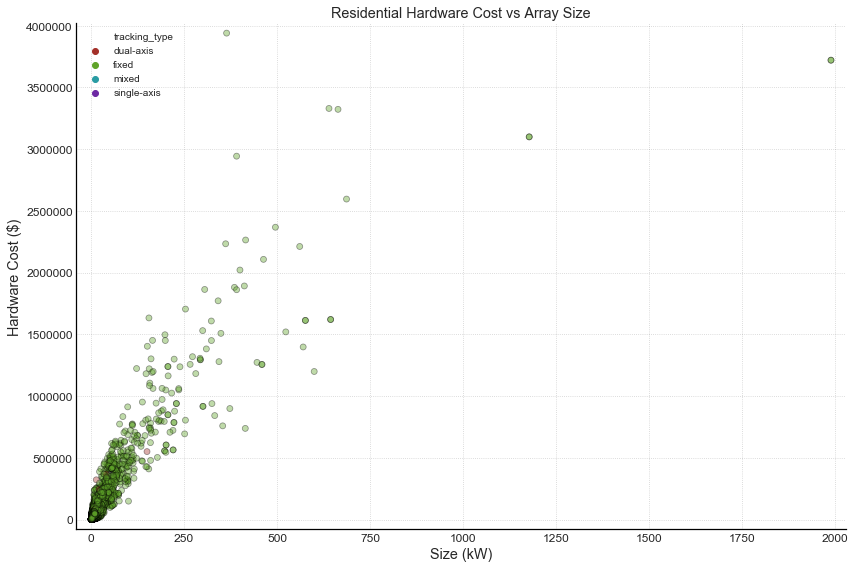

In [29]:
# SCATTER PLOT

# figure size
scatter_plot(x='size_kw',
             y='cost',
             title='Residential Hardware Cost vs Array Size',
             xlabel='Size (kW)',
             ylabel='Hardware Cost ($)',
             **scatter_settings
            )
plt.show()

In [30]:
# pv_df['tech_1'].value_counts()

In [31]:
pv_df[pv_df['size_kw'] > 100][['size_kw', 'annual_pv_prod', 'total_cost', 'cost']].sort_values('size_kw').head()

size_kw  annual_pv_prod  total_cost        cost
706225 100.1400     154863.8207 995956.3636 547776.0000
206461 100.1400     153092.6433 995956.3636 547776.0000
256543 100.5900     131558.0903 272727.2727 150000.0000
278226 100.7160     123689.4770 780840.4545 429462.2500
58682  100.8150     133367.1076 887118.1818 487915.0000

In [32]:
pv_df.total_cost.describe()

count    661288.0000
mean      61986.6547
std       57621.7310
min         412.7273
25%       38228.7636
50%       53936.3636
75%       75083.6364
max     7163636.3636
Name: total_cost, dtype: float64

The energy production values show us a similiar story as the capacity. There are numerous values which are not representative of a typical residential installation. 

## Estimate Area of Array
E = Area * r * H * PR

- E = annual power output (theoretical)
- A = area in sq. meters
- r = solar panel yield/efficiency
- H = annual mean solar radiation
- PR = perfromance ratio (coefficient for losses), ranges between 0.5 - 0.9

In [33]:
# combination of solar panel efficiency and performance ratio
# size_kw = area * output of module

epr = 0.9 * 0.15
print((((pv_df['size_kw'] * pv_df['annual_insolation'])*(epr)).describe()))
# compare statistics to the annual power output
pv_df['annual_pv_prod'].describe()

count      886643.0000
mean         1958.0966
std        228987.0319
min             1.4832
25%           995.3714
50%          1426.9799
75%          1988.3843
max     198831567.7011
dtype: float64


count       886655.0000
mean         10984.7394
std        1282398.4804
min              8.6602
25%           5640.4733
50%           8037.7193
75%          11161.7068
max     1113475807.0000
Name: annual_pv_prod, dtype: float64

In [34]:
# estimate the area of solar array, square meters

# ASSUMPTIONS:
# performance ratio = 0.75
# efficiency = 0.18

# Area = Power Output / r*Pr*H
pv_df['area_est'] = pv_df['annual_pv_prod'] / (pv_df['annual_insolation'] * 0.75 * 0.18)
pv_df['area_est'].describe()

count    886643.0000
mean         41.6318
std        4755.6772
min           0.0327
25%          21.3489
50%          30.5325
75%          42.6073
max     4129056.9603
Name: area_est, dtype: float64

In [35]:
# power density of module, kW per sq. meter
pv_df['power_density'] = pv_df['size_kw'] / pv_df['area_est']
pv_df['power_density'].describe()

count   886643.0000
mean         0.1780
std          0.0109
min          0.1227
25%          0.1713
50%          0.1769
75%          0.1826
max          0.2188
Name: power_density, dtype: float64

## Scatter Plots

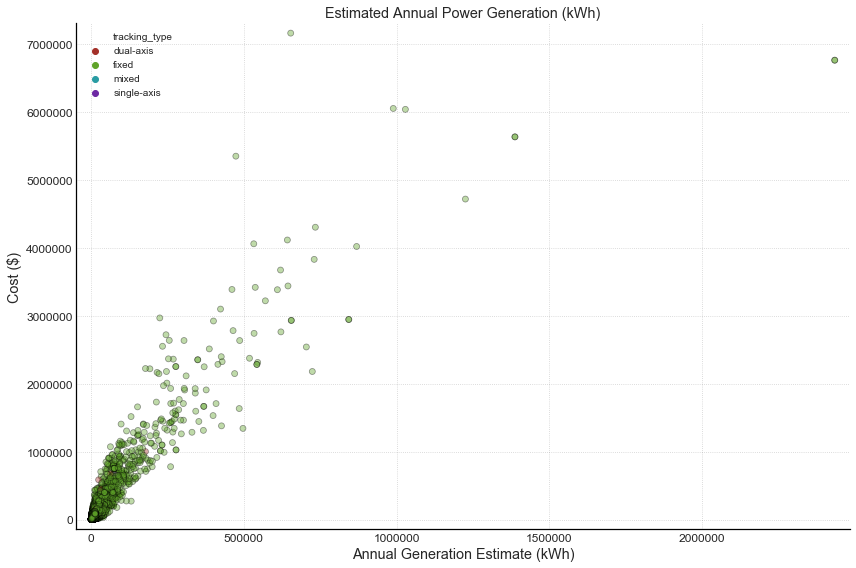

In [36]:
# SCATTER PLOT
scatter_plot(x='annual_pv_prod',
             y='total_cost',
             title='Estimated Annual Power Generation (kWh)',
             xlabel='Annual Generation Estimate (kWh)',
             ylabel='Cost ($)',
             **scatter_settings
            )

plt.show()


In general, the pattern appears to be linear. However, considering that this is supposed to be all residential installations, the magnitude of capacity and total cost does not make sense. Typically, the average residential solar array capacity will range from 6 to 8kW, but this data contains values which are well beyond 'average'. For example,  it is extemely unlikely (if not impossible) that any home will have a need for a *100 kW* system that produces about *154,864 kWh* annualy and costs $995,956. The most valid explanation may be that these data points have been misclassified. It is more reasonable to assume that these data points represent *commercial* or *utility* type of construction. 

Therefore, this project will follow through on the assumption that these extreme values have been misclasified and do not actually represent residential values. 

In [37]:

xmax = np.quantile(pv_df['size_kw'], 0.975)
ymax = np.quantile(pv_df['annual_pv_prod'], 0.975)

In [38]:
# scatter_settings

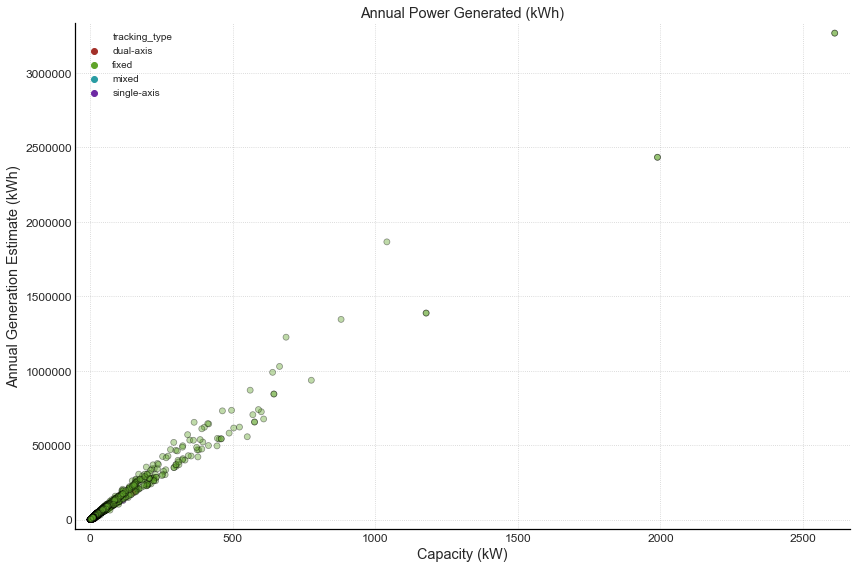

In [39]:
# pick columns for 3rd dimension
col_name = 'tracking_type'
numColors = pv_df[col_name].nunique()
h = pv_df[col_name]
# pal = sns.hls_palette(numColors, l=.4, s=.6)

sns.scatterplot(x=pv_df['size_kw'],
                y=pv_df['annual_pv_prod'],
               **scatter_settings
               )

# define limits
# plt.ylim([0, ymax])
# plt.xlim([0, xmax])

# label axis, and title
plt.xlabel('Capacity (kW)')
plt.ylabel('Annual Generation Estimate (kWh)')
plt.title('Annual Power Generated (kWh)')

plt.tight_layout()
plt.show()

Again, the scatter plot reveal a few things. Considering that we're looking at residential systems, the capacity and production doesn't make sense. The average electricity consumption per household is about 10,766 kWh per year in the United States. The plot above shows an estimated production of up to 10 million killowatt hours or 10,000 megawatt hours. These types of instances are not residential and therefore must be filtered out to produce a more realistic data set of energy production and system capacity.


### Box Plots

With box plots we can visually detect outliers and then determine the best course of action.

In [40]:
# sns.boxplot??

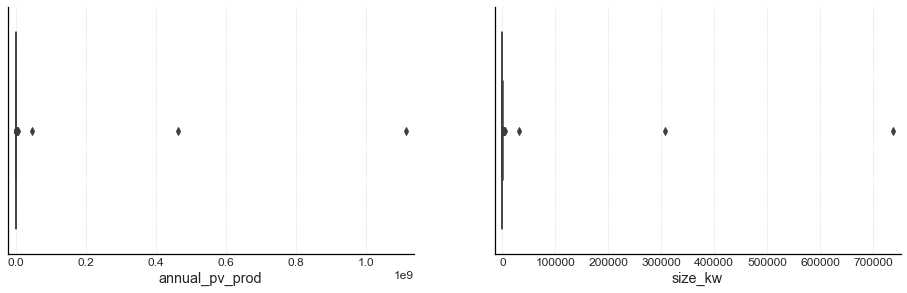

In [41]:
plt.subplots(1,2, figsize=(16,10))

plt.subplot(221)
sns.boxplot(x=pv_df['annual_pv_prod'],
           palette=pal,
           )

plt.subplot(222)
sns.boxplot(x=pv_df['size_kw'],
            palette=pal,
           )
plt.show()

The box plots above are quite skewed by outliers so it's worth filtering outliers for one of the variables. Since the two variables are correlated, we can filter only one and the other will fall in line. Additionally, the covariance between the variables must be addressed.

Using a for loop, we can iterate over specific columns and filter out the outliers. This will result in a more realistic residential data set as the more extreme values will be exluded. 


In [42]:
# REMOVE OUTLIERS WITH PERCENTILES

# use percentiles to remove outliers and high influence points
colName = 'size_kw'

# input percentiles
pr = [2.5, 97.5]

pv_prod_percentiles = np.percentile(pv_df[colName].dropna(), pr)
pv_df_noOutliers = pv_df[pv_df[colName] <= pv_prod_percentiles[1]]
# pv_df_noOutliers = pv_df[(pv_df[colName] >= size_percentiles[0]) & (pv_df[colName] <= size_percentiles[1])]


In [44]:
# apply same method two other columns
columns = ['annual_pv_prod', 'cost']

for colName in columns:
    cost_percentiles = np.percentile(pv_df_noOutliers[colName].dropna(), pr)
    pv_df_noOutliers = pv_df_noOutliers[pv_df_noOutliers[colName] <= cost_percentiles[1]]

    

In [43]:
# COMPUTE STATS for each column
# loop over other columns and filter 95th percentile

# INPUTS: column names and percentile as lists
col_names = ['size_kw',
             'cost_per_watt',
             'cost',
             'annual_pv_prod',
            ]

# store statistics in a dictionary
stats = {'mean': {},
        'median':{}
        }

for column in col_names:
#     size_percentiles = np.percentile(pv_df_noOutliers[column].dropna(), pr)
#     pv_df_noOutliers = pv_df_noOutliers[(pv_df_noOutliers[column] <= size_percentiles[1])]
    
    # calculate stats and add to dictionary
    mean = round(np.mean(pv_df_noOutliers[column].dropna()), 2)
    median = round(np.median(pv_df_noOutliers[column].dropna()), 2)
    stats['mean'][column] = mean
    stats['median'][column] = median
    

    
# pv_df_noOutliers.info()

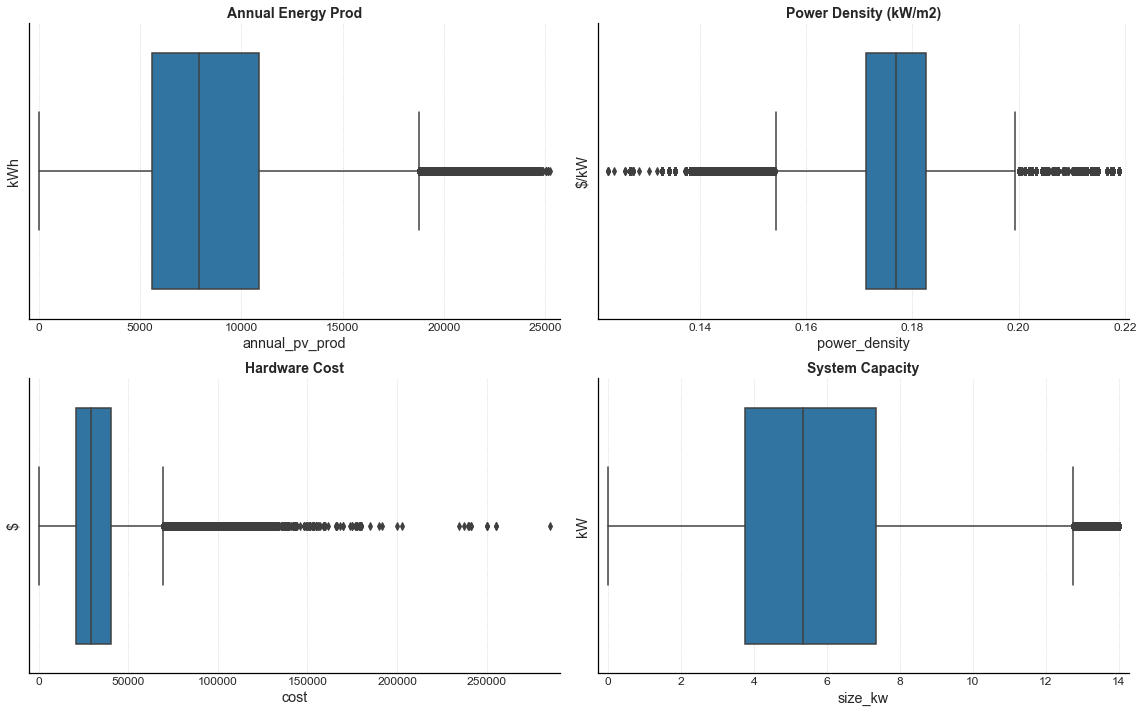

In [51]:
fig, ax = plt.subplots(2,2, figsize=(16,10))

bins_n, dens, title_loc = [50, True, 'center']
font = {'fontsize': 14,
       'fontweight': 'bold',
       }

# annual energy produced
ax[0,0].set_title('Annual Energy Prod', loc=title_loc, fontdict=font)
# ax[0,0].boxplot(pv_df_noOutliers['annual_pv_prod'].dropna(), showmeans=True)
sns.boxplot(pv_df_noOutliers['annual_pv_prod'].dropna(),
           ax=ax[0,0],
           )
ax[0,0].set_ylabel('kWh')

# cost per kilowatt
ax[0,1].set_title('Power Density (kW/m2)', loc=title_loc, fontdict=font)
sns.boxplot(pv_df_noOutliers['power_density'].dropna(),
           ax=ax[0,1],
           )
ax[0,1].set_ylabel('$/kW')

# total cost
ax[1,0].set_title('Hardware Cost', loc=title_loc, fontdict=font)
sns.boxplot(pv_df_noOutliers['cost'].dropna(),
           ax=ax[1,0],
           )
ax[1,0].set_ylabel('$')

# capacity
ax[1,1].set_title('System Capacity', loc=title_loc, fontdict=font)
sns.boxplot(pv_df_noOutliers['size_kw'].dropna(),
           ax=ax[1,1],
           )
ax[1,1].set_ylabel('kW')

plt.tight_layout()
plt.show()

The values in *annual_pv_prod* column (estimated annual energy production) represent the annual electric demand for a residence and the solar array is then designed around this demand. This annual demand is calculated from the daily energy usage which can be obtained from the utility bill. A system size/DC output (*size_kw*) is then estimated based on the required annual energy. In addition, the size of the roof may be a limiting factor. In that case, other components such as the tracking type and module techonology type will come into play and affect the cost of hardware. The output of individual modules vary depending on technology used as represented by column *tech_1*. Therefore, if space is limited, then more expensive modules may need to be installed in order to achieve the estimated power output. Essentially, the size of the roof will be a factor in determining the total cost of the harware. Furthermore, tracking may need to considered as an alternative or in addition to module technology type. Modules which track the sun as it moves across the sky will be more likely to maintain their peak output longer than fixed modules and thus produce more power on a daily basis and annual. 

In theory, removing outliers in *annual_pv_prod*, *size_kw*, and *cost* should result in a more realistic residential annual energy demand and hardware costs. This should also remove some of the outliers in other columns such as *size_kw*, *power_density*, and *cost_per_watt*. However, there are remaining outliers which will be preserved for analysis and that is because the cost and energy demands varies by state.

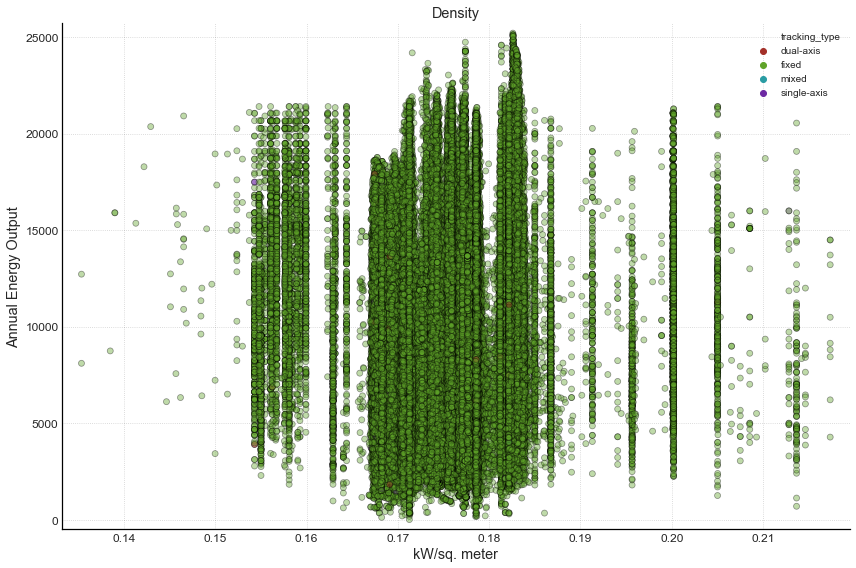

In [45]:
# POWER DENSITY
scatter_plot(x='power_density',
             y='annual_pv_prod',
             data=pv_df_noOutliers,
             title='Density',
             xlabel='kW/sq. meter',
             ylabel='Annual Energy Output',
             **scatter_settings
            )
plt.show()



#### ECDF

In [46]:

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

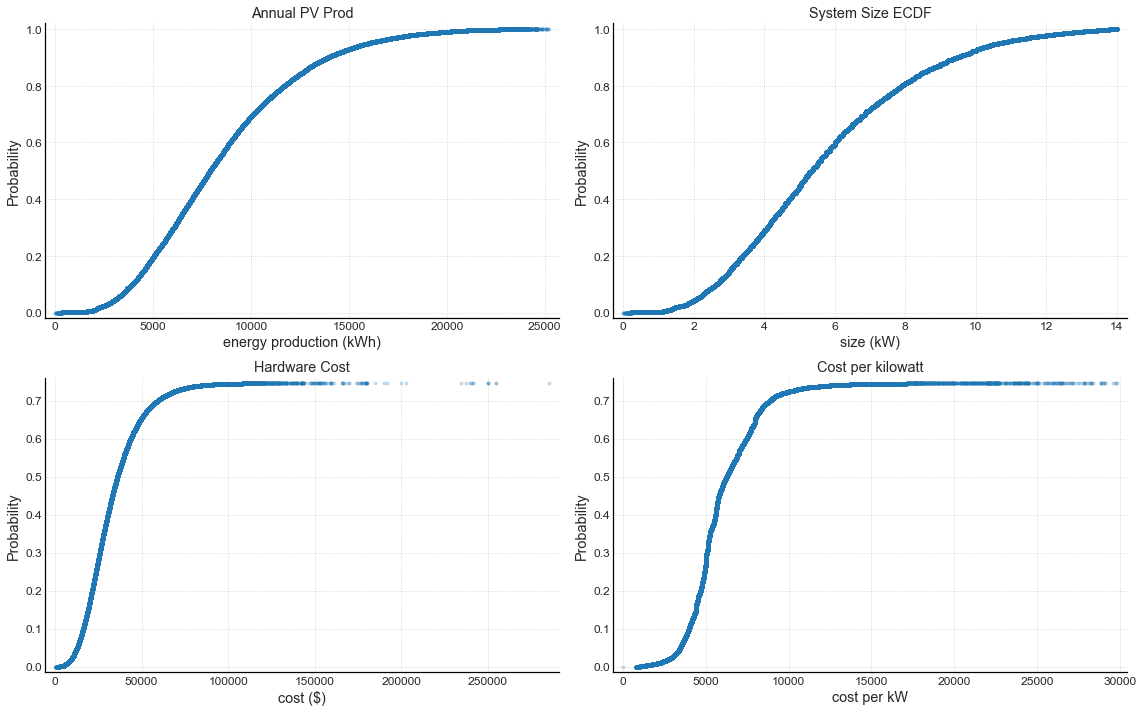

In [47]:
# ECDF subplots

ecdf_settings = {'marker': '.',
                 'linestyle': 'none',
                 'alpha': 0.2
                }

x1, y1 = ecdf(pv_df_noOutliers['annual_pv_prod'])
x2, y2 = ecdf(pv_df_noOutliers['size_kw'])
x3, y3 = ecdf(pv_df_noOutliers['cost'])
x4, y4 = ecdf(pv_df_noOutliers['cost_per_watt'])

# define the number of subplots
plt.subplots(2,2, figsize=(16,10))

# ANNUAL PV PROD
plt.subplot(221)
plt.plot(x1, y1,
         **ecdf_settings
        )

plt.title('Annual PV Prod')
plt.ylabel('Probability')
plt.xlabel('energy production (kWh)')

# SYSTEM SIZE
plt.subplot(222)
plt.plot(x2, y2,
         **ecdf_settings
        )
plt.title('System Size ECDF')
plt.xlabel('size (kW)')
plt.ylabel('Probability')

# HARDWARE COST
plt.subplot(223)
plt.plot(x3, y3,
         **ecdf_settings
        )
plt.title('Hardware Cost')
plt.ylabel('Probability')
plt.xlabel('cost ($)')

# COST PER KILOWATT
plt.subplot(224)
plt.plot(x4, y4,
         **ecdf_settings
        )
plt.title('Cost per kilowatt')
plt.ylabel('Probability')
plt.xlabel('cost per kW')

plt.tight_layout()
plt.show()

From the ECDF above, we can obtain some meaningful statistics about each feature. For example, in terms of annual energy estimate (Annual PV Prod), we can see that about 75% of households require 10,000 kWh of energy or less. In terms of hardware costs, about 74% of people have paid less than $35,000. Keep in mind that these numbers are historical ranging from 1998 to 2017. 

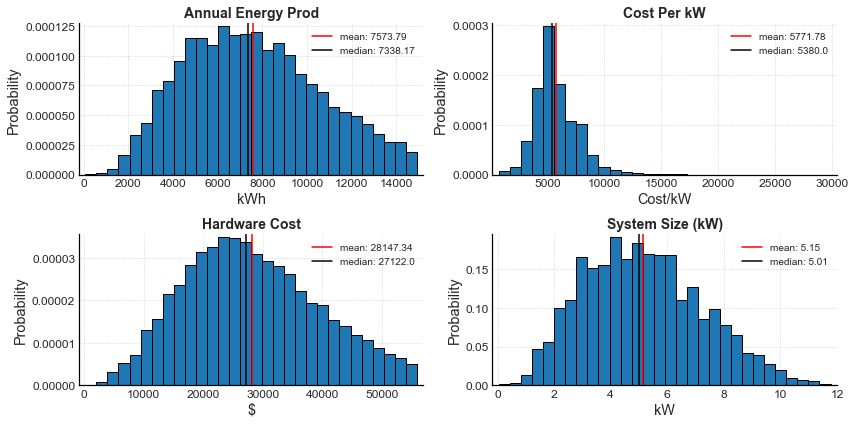

In [208]:
fig, ax = plt.subplots(2,2, figsize=(12,6))

title_loc, legend_loc = ['center', 'upper right']
histogram_settings = {'bins': 30,
                      'density': True,
                      'edgecolor': 'k',
                     }

font = {'fontsize': 14,
       'fontweight': 'bold',
       }

# ANNUAL ENERGY PRODUCTION ESTIMATE
ax[0,0].set_title('Annual Energy Prod', loc=title_loc, fontdict=font)
ax[0,0].hist(pv_df_noOutliers['annual_pv_prod'].dropna(), **histogram_settings)
# labels
ax[0,0].set_xlabel('kWh')
ax[0,0].set_ylabel('Probability')
# lines for summary stats, and legend
ax[0,0].axvline(x=stats['mean']['annual_pv_prod'],
                color='red'
               )
ax[0,0].axvline(x=stats['median']['annual_pv_prod'],
                color='black'
               )
ax[0,0].legend(("mean: {}".format(stats['mean']['annual_pv_prod']),
                "median: {}".format(stats['median']['annual_pv_prod'])),
               loc=legend_loc
              )

# COST PER KILOWATT
ax[0,1].set_title('Cost Per kW', loc=title_loc, fontdict=font)
ax[0,1].hist(pv_df_noOutliers['cost_per_watt'].dropna(), **histogram_settings)
# labels
ax[0,1].set_xlabel('Cost/kW')
ax[0,1].set_ylabel('Probability')
# lines for summary stats, and legend
ax[0,1].axvline(x=stats['mean']['cost_per_watt'],
                color='red'
               )
ax[0,1].axvline(x=stats['median']['cost_per_watt'],
                color='black'
               )
ax[0,1].legend(("mean: {}".format(stats['mean']['cost_per_watt']),
                "median: {}".format(stats['median']['cost_per_watt'])),
               loc=legend_loc
              )

# TOTAL COST
ax[1,0].set_title('Hardware Cost', loc=title_loc, fontdict=font)
ax[1,0].hist(pv_df_noOutliers['cost'].dropna(), **histogram_settings)
# labels
ax[1,0].set_xlabel('$')
ax[1,0].set_ylabel('Probability')
# lines for summary stats, and legend
ax[1,0].axvline(x=stats['mean']['cost'],
                color='red'
               )
ax[1,0].axvline(x=stats['median']['cost'],
                color='black'
               )
ax[1,0].legend(("mean: {}".format(stats['mean']['cost']),
                "median: {}".format(stats['median']['cost'])),
               loc=legend_loc
              )

# SYSTEM CAPACITY
ax[1,1].set_title('System Size (kW)', loc=title_loc, fontdict=font)
ax[1,1].hist(pv_df_noOutliers['size_kw'].dropna(), **histogram_settings)
# labels
ax[1,1].set_xlabel('kW')
ax[1,1].set_ylabel('Probability')
# lines for summary stats, and legend
ax[1,1].axvline(x=stats['mean']['size_kw'], color='red')
ax[1,1].axvline(x=stats['median']['size_kw'], color='black')
ax[1,1].legend(
    ("mean: {}".format(stats['mean']['size_kw']),
     "median: {}".format(stats['median']['size_kw'])
    ),
    loc=legend_loc
)

plt.tight_layout()
plt.show()

#### National Average Hardware Cost and System Capacity

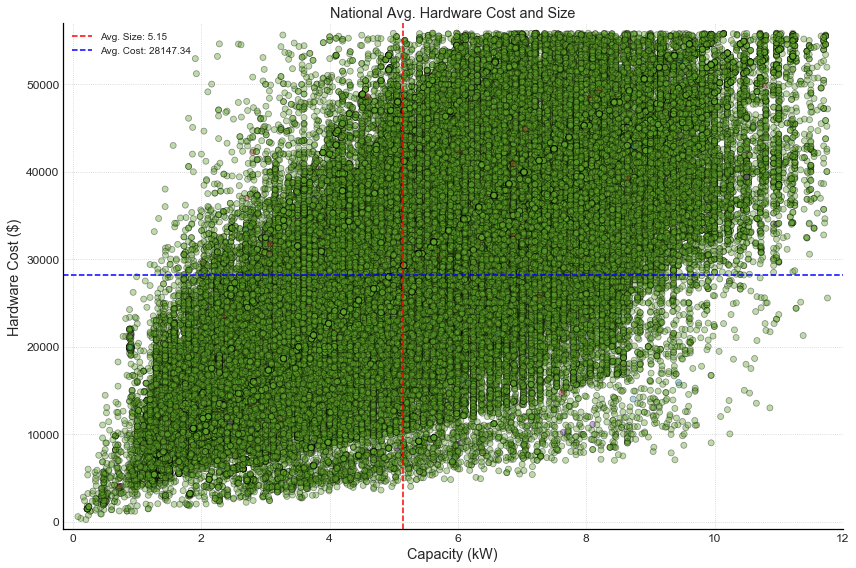

In [335]:
# AVERAGE COST AND SIZE
mean_cost = round(pv_df_noOutliers['cost'].mean(), 2)
mean_size = round(pv_df_noOutliers['size_kw'].mean(), 2)

# sns.scatterplot(x=pv_df_noOutliers['size_kw'],
#                 y=pv_df_noOutliers['cost'],
#                 **scatter_settings
#                )

# # label axis, and title
# plt.xlabel('Capacity (kW)')
# plt.ylabel('Hardware Cost ($)')
# plt.title('')

scatter_plot(x='size_kw',
             y='cost',
             title='National Avg. Hardware Cost and Size',
             xlabel='Capacity (kW)',
             ylabel='Hardware Cost ($)',
             data=pv_df_noOutliers,
             **scatter_settings
            )

# draw vertical lines
plt.axvline(x=mean_size,
            color='red',
            linestyle='--'
           )
plt.axhline(y=mean_cost,
            color='blue',
            linestyle='--'
           )

# draw text
font = {'size': 14,
        'weight': 'bold',
       }


plt.legend((f'Avg. Size: {mean_size}', f'Avg. Cost: {mean_cost}'))

plt.tight_layout()
plt.show()

In [336]:
def plot_state(state, x, y, **kwargs):
    """
    Plot average cost and size for a specified state.
    """
    pv_state = pv_df_noOutliers[pv_df_noOutliers['state'] == state]
    
    mean_cost = round(pv_state[y].mean(), 2)
    mean_size = round(pv_state[x].mean(), 2)
    
    sns.scatterplot(x=pv_state[x],
                    y=pv_state[y],
                    **kwargs
                   )
    # label axis, and title
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.title(f"{state.upper()} Avg. \nHardware Cost")
    # draw vertical lines
    plt.axvline(x=mean_size,
                color='black',
                linestyle='--'
               )
    plt.axhline(y=mean_cost,
                color='black',
                linestyle='--'
               )
    plt.tight_layout()
    plt.show()

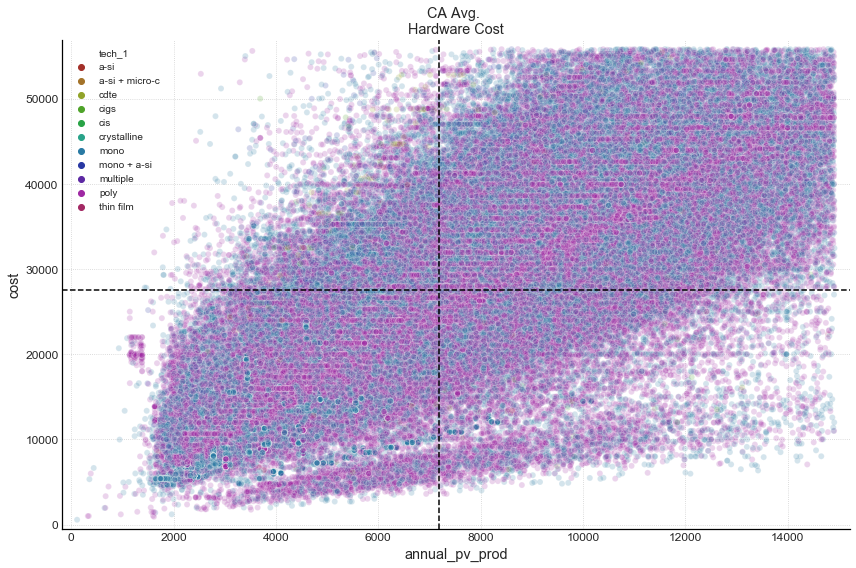

In [211]:
h, pal = generate_palette('tech_1')

plot_state(state='ca',
           x='annual_pv_prod',
           y='cost',
           hue=h,
           palette=pal,
           alpha=0.2
          )

In [212]:
pv_df_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564781 entries, 2 to 886654
Data columns (total 27 columns):
state                          564781 non-null object
date_installed                 564781 non-null object
incentive_prog_names           424074 non-null object
size_kw                        564781 non-null float64
zipcode                        564781 non-null int64
install_type                   564781 non-null category
installer                      371134 non-null object
cost_per_watt                  564777 non-null float64
cost                           564781 non-null float64
city                           425403 non-null object
utility_clean                  422125 non-null object
tech_1                         333455 non-null category
model1_clean                   333455 non-null object
county                         561155 non-null object
annual_pv_prod                 564781 non-null float64
annual_insolation              564776 non-null float64
rebate           

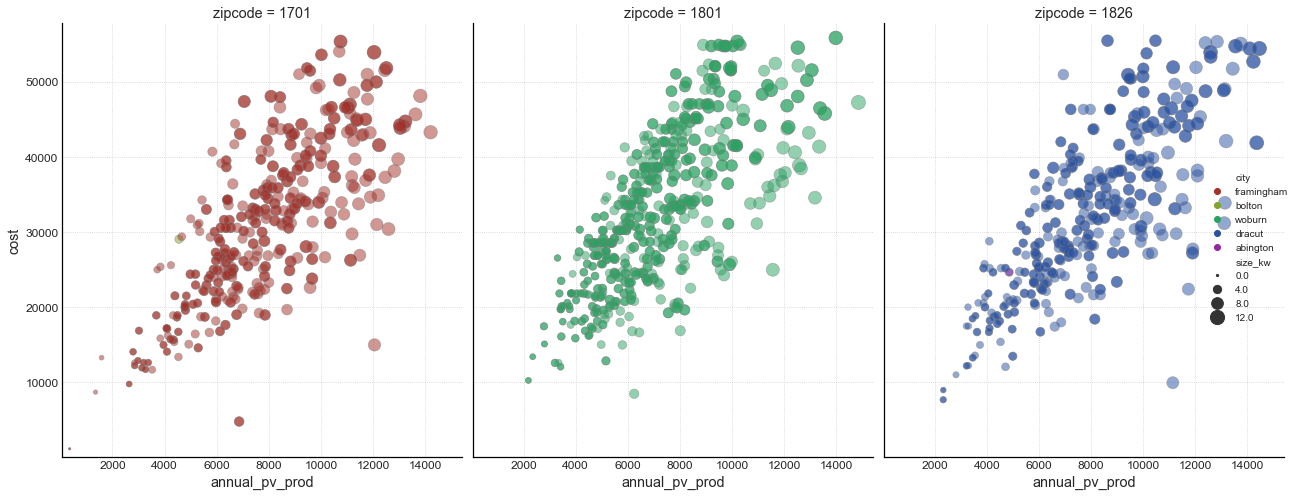

In [213]:
# h, pal = generate_palette('city')

# input state to explore
state_df = pv_df_noOutliers[pv_df_noOutliers['state']=='ma']

# exract top county (most installations)
top_county = state_df.county.value_counts().index[0]
county_df = state_df[state_df['county']==top_county]

# select top 3 within given feature (city, zipcode, etc.)
feature = 'zipcode'
city_1, city_2, city_3 = county_df[feature].value_counts()[:3].index

city_df = county_df[(county_df[feature]==city_1)|
                    (county_df[feature]==city_2)|
                    (county_df[feature]==city_3)
                   ]

h, pal = generate_palette('city', city_df)

sns.relplot(x='annual_pv_prod',
            y='cost',
            hue=h,
            col=feature,
            size='size_kw',
            sizes=(5,200),
            palette=pal,
            data=city_df,
            alpha=0.5,
            edgecolor='grey',
            aspect=0.8,
            height=7,
            legend='brief'
           )

plt.tight_layout()
plt.show()

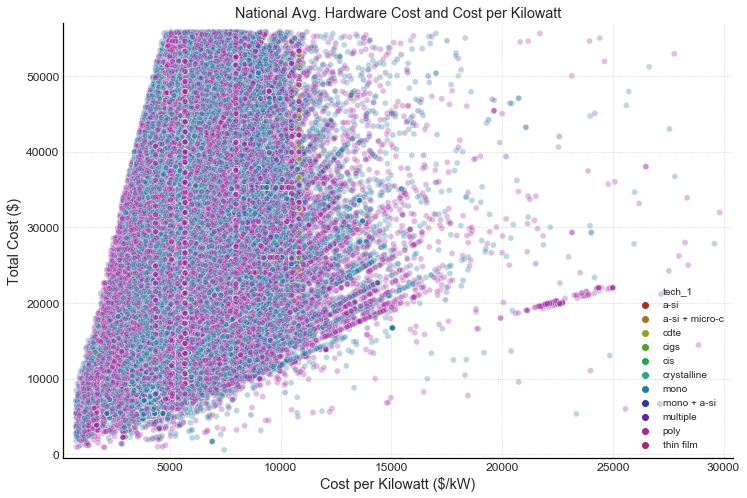

In [214]:
# pick columns for 3rd dimension
# col_name = 'tech_1'
# numColors = pv_df[col_name].nunique()
# h = pv_df[col_name]
# pal = sns.hls_palette(numColors, l=.4, s=.6)

h, pal = generate_palette('tech_1')

sns.scatterplot(x=pv_df_noOutliers['cost_per_watt'],
                y=pv_df_noOutliers['cost'],
                hue=h,
                palette=pal,
                alpha=0.3,
               )

# label axis, and title
plt.xlabel('Cost per Kilowatt ($/kW)')
plt.ylabel('Total Cost ($)')
plt.title('National Avg. Hardware Cost and Cost per Kilowatt')
plt.show()

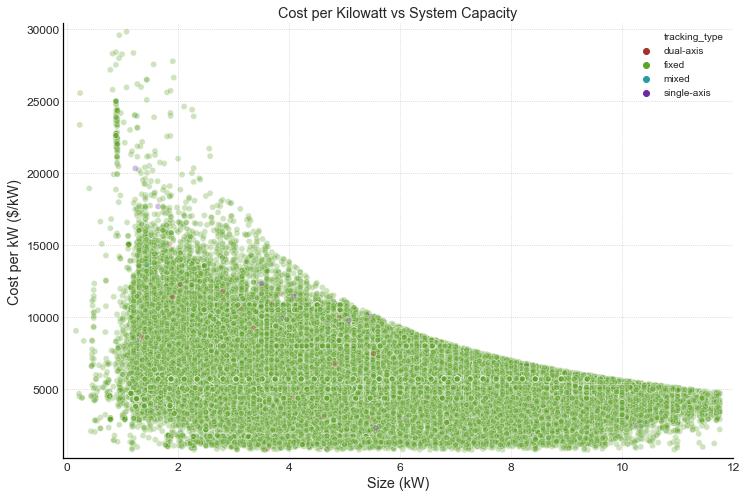

In [215]:
# SCATTER PLOT
# cost per watt and size_kw
h, pal = generate_palette('tracking_type')

sns.scatterplot(x=pv_df_noOutliers['size_kw'],
                y=pv_df_noOutliers['cost_per_watt'],
                hue=h,
                palette=pal,
                alpha=0.3,
               )

# label axis, and title
plt.xlabel('Size (kW)')
plt.ylabel('Cost per kW ($/kW)')
plt.title('Cost per Kilowatt vs System Capacity')

plt.show()

In [216]:
pv_df_noOutliers['tech_1'].value_counts(ascending=False)

poly              196090
mono              127495
crystalline         5211
mono + a-si         3435
cigs                 561
cdte                 406
a-si                 133
a-si + micro-c        47
thin film             42
multiple              32
cis                    3
Name: tech_1, dtype: int64

In [217]:
# PRICE VARIANCE BOXPLOT FUNCTION

def variance_boxplot(x, y, title, xlabel, ylabel):
    """
    Boxplot to visualize variance among 'x' category in 'y' dimension
    EX.:
        Price variance of technology (categorical feature)
    """
    h, pal = generate_palette(x)
    sns.boxplot(x=pv_df_noOutliers[x],
                y=pv_df_noOutliers[y],
                palette=pal
               )
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()

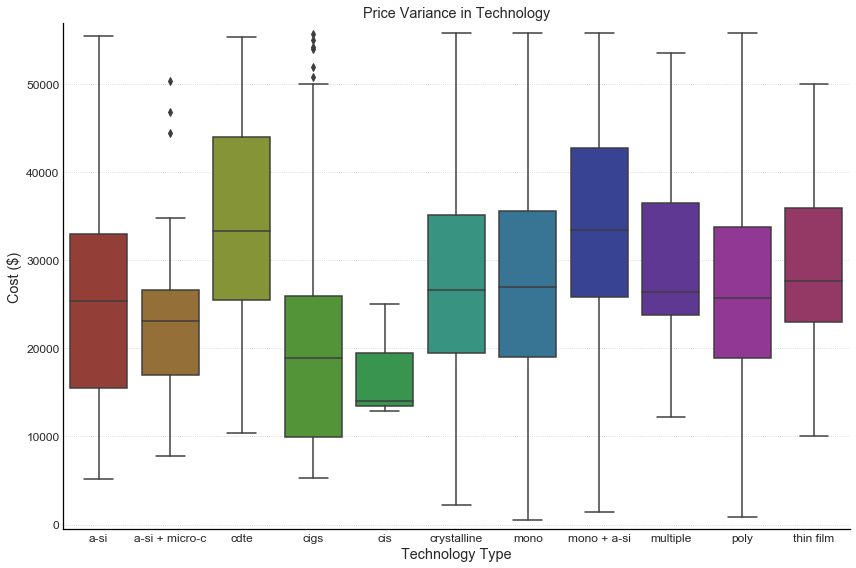

In [218]:
# plot price variance in technology
variance_boxplot(x='tech_1',
                y='cost',
                title='Price Variance in Technology',
                xlabel='Technology Type',
                ylabel='Cost ($)'
                )

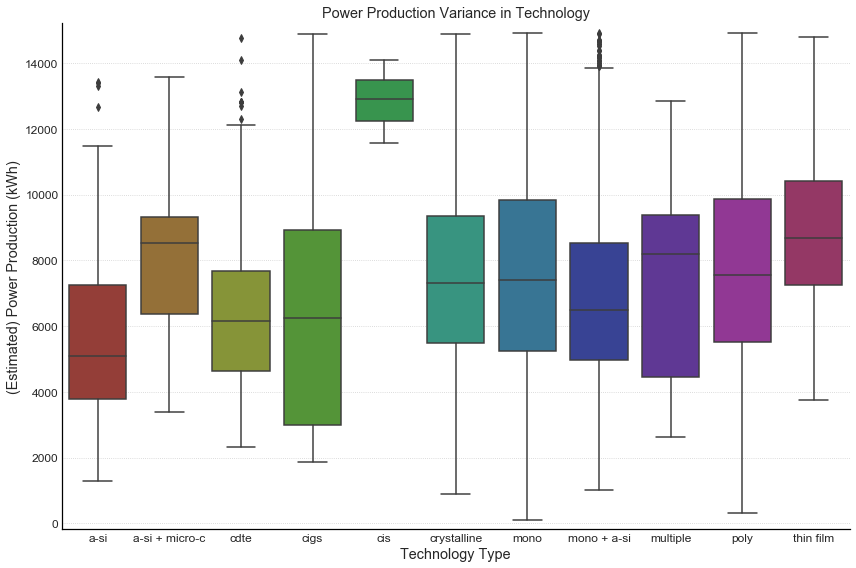

In [219]:
# plot energy estimate variance in technology
variance_boxplot(x='tech_1',
                y='annual_pv_prod',
                title='Power Production Variance in Technology',
                xlabel='Technology Type',
                ylabel='(Estimated) Power Production (kWh)'
                )

The boxplots indicate that the CIS (copper, indium, selenium) modules have a higher power production with much lower variance and relatively cheaper than most other technologies. However, previous scatter plots indicate that the most prevalent technology type has been polycrystalline (poly) and monocrystalline (mono). The issues with CIS and CIGS have to do with their material complexity, toxicity, and low manufacturing yields.

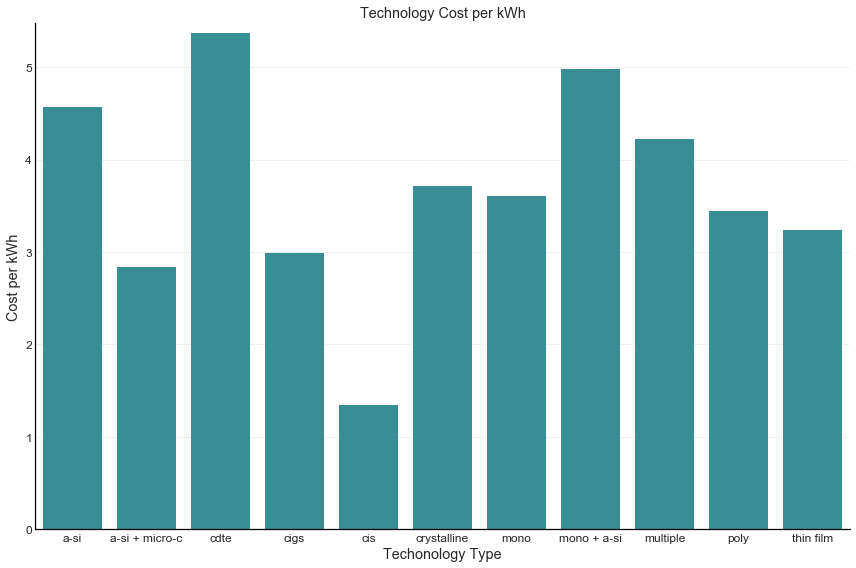

In [220]:
# TECHNOLOGY TYPE
# group by technology and tracking
# compare costs, energy production, size

tech_grp = pv_df_noOutliers.groupby('tech_1').mean()[['cost', 'annual_pv_prod']].sort_values(by='cost', ascending=False)
tech_grp['cost_per_kwh'] = tech_grp['cost'] / tech_grp['annual_pv_prod']
tech_grp.sort_values(by='cost_per_kwh')

sns.barplot(x=tech_grp.index,
            y=tech_grp['cost_per_kwh'],
#             palette=generate_palette('tech_1')[1],
            color=color[2]
           )
plt.xlabel('Techonology Type')
plt.ylabel('Cost per kWh')
plt.title('Technology Cost per kWh')

plt.tight_layout()
plt.show()

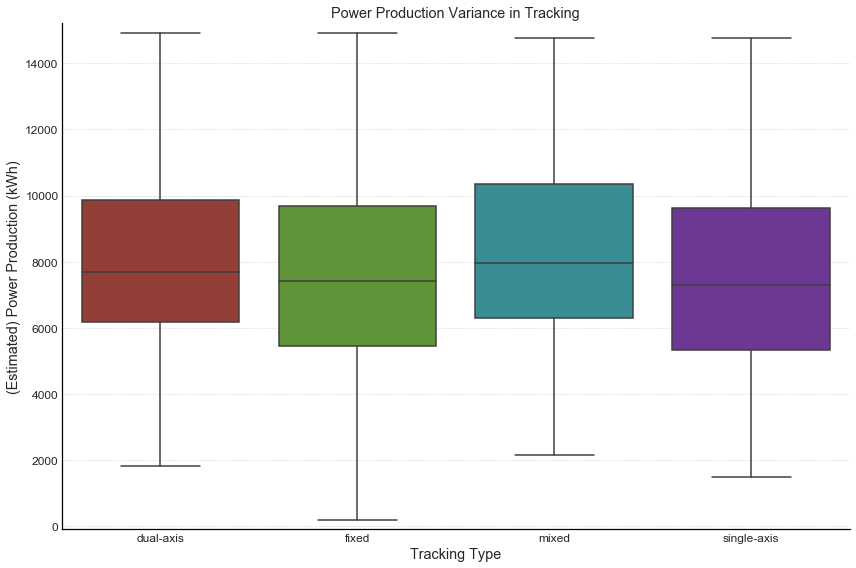

In [221]:
# TRACKING TYPE

# plot tracking and power production
variance_boxplot(x='tracking_type',
                y='annual_pv_prod',
                title='Power Production Variance in Tracking',
                xlabel='Tracking Type',
                ylabel='(Estimated) Power Production (kWh)'
                )

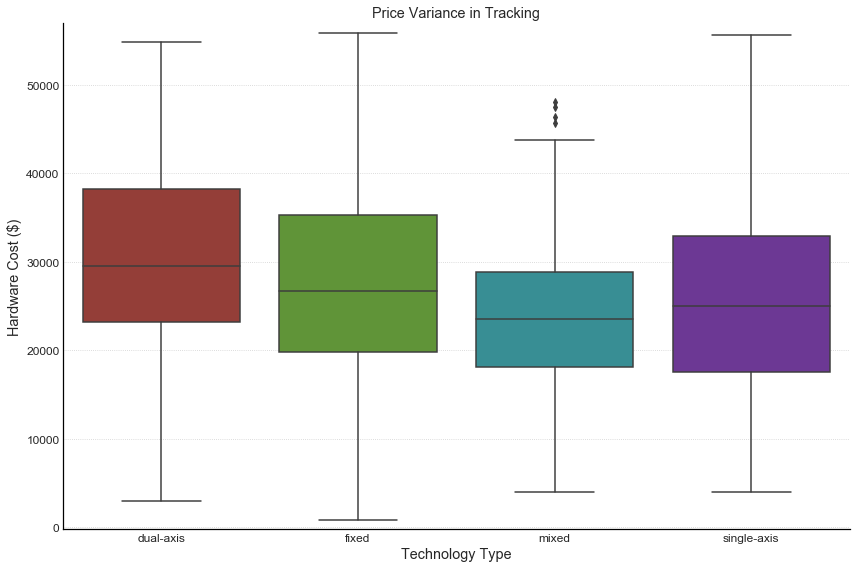

In [222]:
# plot tracking and price
variance_boxplot(x='tracking_type',
                y='cost',
                title='Price Variance in Tracking',
                xlabel='Technology Type',
                ylabel='Hardware Cost ($)'
                )

In [223]:
pv_df_noOutliers = drop_n_reset(pv_df_noOutliers)
pv_df_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564781 entries, 0 to 564780
Data columns (total 27 columns):
state                          564781 non-null object
date_installed                 564781 non-null object
incentive_prog_names           424074 non-null object
size_kw                        564781 non-null float64
zipcode                        564781 non-null int64
install_type                   564781 non-null category
installer                      371134 non-null object
cost_per_watt                  564777 non-null float64
cost                           564781 non-null float64
city                           425403 non-null object
utility_clean                  422125 non-null object
tech_1                         333455 non-null category
model1_clean                   333455 non-null object
county                         561155 non-null object
annual_pv_prod                 564781 non-null float64
annual_insolation              564776 non-null float64
rebate           

## Statistics by State

In [224]:
# rebate_cost_ratio = rebate/cost
pv_df_noOutliers['rebate_cost_ratio'] = (pv_df_noOutliers['rebate'] / pv_df_noOutliers['cost'])*100
pv_df_noOutliers['sales_tax_percent'] = pv_df_noOutliers['sales_tax_cost'] / pv_df_noOutliers['cost'] * 100
# print(pv_df_noOutliers['sales_tax_percent'].describe())
print(pv_df_noOutliers['rebate_cost_ratio'].describe())

count   277930.0000
mean        16.5167
std         16.1637
min          0.0000
25%          4.1667
50%         10.2983
75%         23.6724
max        959.1030
Name: rebate_cost_ratio, dtype: float64


In [225]:
tax_group = pv_df_noOutliers.groupby('state')['sales_tax_percent'].mean().sort_values()
# tax_group['ri':'nh']

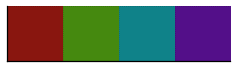

In [226]:
color = sns.hls_palette(4, l=.3, s=.8)
sns.palplot(color)
barplot_settings = {'width': 1,
                   'edgecolor': 'k',
                    'color': color[2]
                   }

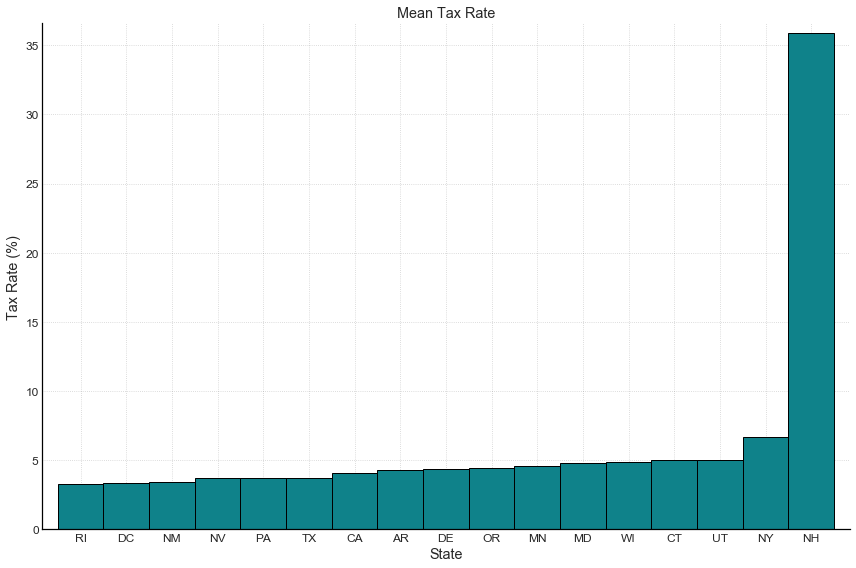

In [227]:

# tax_group['ri':'nh'].plot(kind='bar')
tax_bar = np.arange(len(tax_group.index))
tax_values = tax_group.values

plt.bar(tax_bar, tax_values, **barplot_settings)

plt.title('Mean Tax Rate')
plt.ylabel('Tax Rate (%)')
plt.xlabel('State')
plt.xticks(tax_bar, tax_group.index.str.upper())

plt.margins(0.02)
plt.tight_layout()
plt.show()

A quick look at the taxes shows that the mean tax rate for each state being in a relatively narrow range with the exception of New Hampshire. These taxes are calculated based on an estimate of sales tax for given year and state, also taking into account any sales tax exemptions that may exist for PV systems. These sales tax are levied only on hardware costs.


In [228]:
# number of installations per state
state_count = pv_df_noOutliers['state'].value_counts(dropna=False).dropna()
fraction = state_count / len(pv_df_noOutliers) * 100
# fraction['ca':'nm']
# fraction

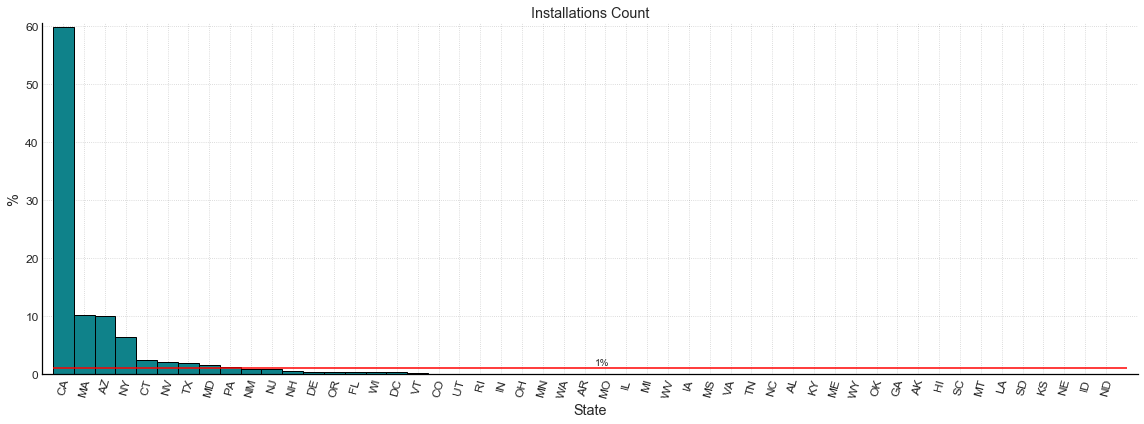

In [229]:
plt.figure(figsize=(16,6))

# fraction['ca':'sc'].plot(kind='bar')

states_ = np.arange(len(fraction.index))
fraction_y = fraction.values

plt.bar(states_, fraction_y, **barplot_settings)
# sns.barplot(x=states_,
#             y=fraction_y,
#             color='blue',
#            hue=h,
#            palette=pal,
#            )
plt.xticks(states_, fraction.index.str.upper(), rotation=75)
plt.ylabel('%')
plt.xlabel('State')
plt.title('Installations Count')

plt.hlines(y=1, xmin=-0.5, xmax=len(fraction.index), color='red')
plt.annotate('1%', xy=(len(fraction.index)/2, 1.5))

plt.margins(0.01)
plt.tight_layout()
plt.show()

After counting the number of installations for each state. California clearly dominates this dataset with over 50% of data coming from a single state. The remainder of states are below 1% in terms of composition as signified by the horizontal green line.


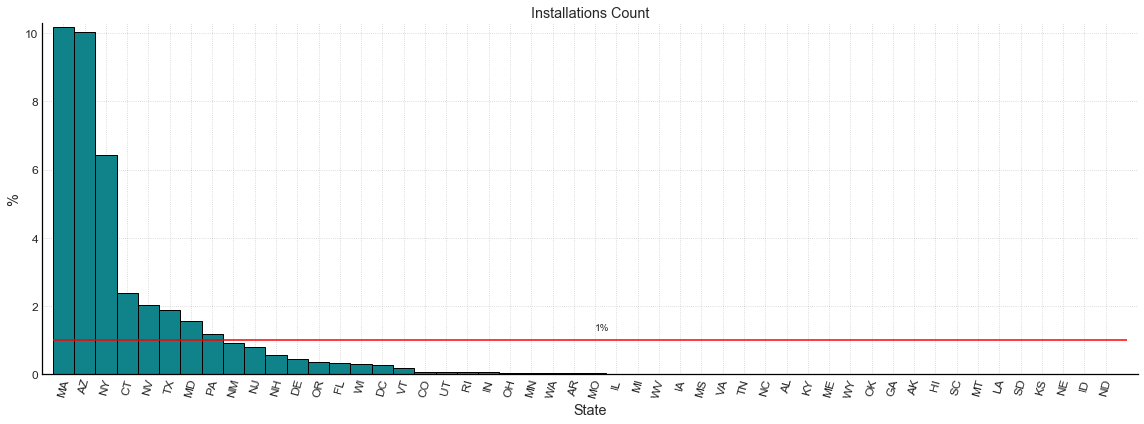

In [230]:
plt.figure(figsize=(16,6))

states_ = np.arange(len(fraction.drop('ca').index))
prct_y = fraction.drop('ca').values

plt.bar(states_, prct_y, **barplot_settings)

plt.xticks(states_, fraction.drop('ca').index.str.upper(), rotation=75)
plt.ylabel('%')
plt.xlabel('State')
plt.title('Installations Count')

plt.hlines(y=1, xmin=-0.5, xmax=len(fraction.drop('ca').index), color='red')
plt.annotate('1%', xy=(len(fraction.drop('ca').index)/2, 1.3))

plt.margins(0.01)
plt.tight_layout()
plt.show()

Removing California from the bar graph we can take a closer look at remainder of states.

In [231]:
# state insolation
state_group_insol = pv_df_noOutliers.groupby('state')['annual_insolation'].mean().sort_values(ascending=False)
# state_group_insol

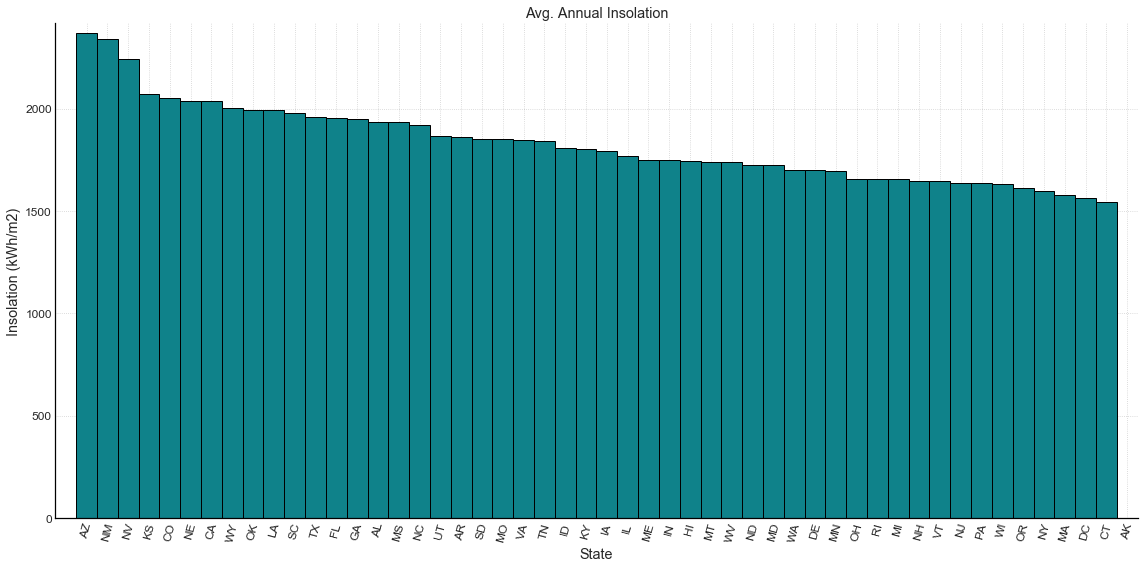

In [232]:
# STATE INSOLATION BAR GRAPH
# state_group_insol.plot(kind='bar')

plt.figure(figsize=(16, 8))

insol_bar = np.arange(len(state_group_insol.index))
insol_values = state_group_insol.values

plt.bar(insol_bar, insol_values, **barplot_settings)
plt.xticks(insol_bar, state_group_insol.index.str.upper(), rotation=75)
plt.ylabel('Insolation (kWh/m2)')
plt.xlabel('State')
plt.title('Avg. Annual Insolation')

plt.tight_layout()
plt.margins(0.02)
plt.show()

In [233]:
# STATES ESTIMATED POWER PRODUCTION
state_energy_estimate = pv_df_noOutliers.groupby('state')['annual_pv_prod'].mean().sort_values(ascending=False).dropna()
# state_energy_estimate

In [234]:
# pv_df_noOutliers[pv_df_noOutliers['state'] == 'id']

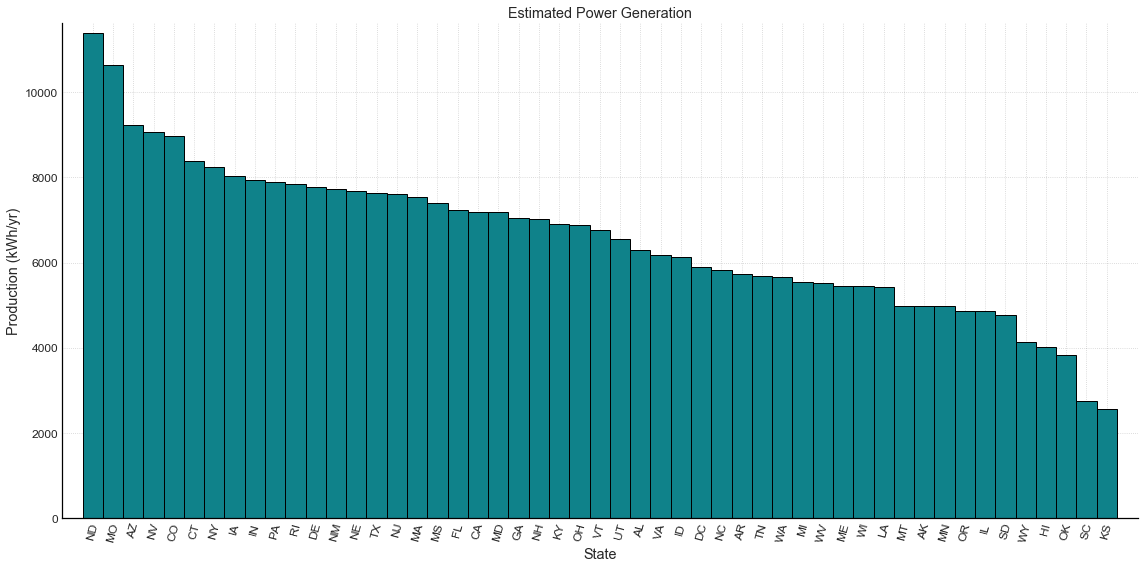

In [235]:
plt.figure(figsize=(16, 8))

e_bar = np.arange(len(state_energy_estimate.index))
energy_values = state_energy_estimate.values

plt.bar(e_bar, energy_values, **barplot_settings)

plt.xticks(e_bar, state_energy_estimate.index.str.upper(), rotation=75)
plt.title('Estimated Power Generation')
plt.ylabel('Production (kWh/yr)')
plt.xlabel('State')
plt.margins(0.02)
plt.tight_layout()
plt.show()

In [236]:
# STATES ACTUAL POWER PRODUCTION
state_energy = pv_df_noOutliers.groupby('state')['reported_annual_energy_prod'].mean().sort_values(ascending=False).dropna()
# state_energy

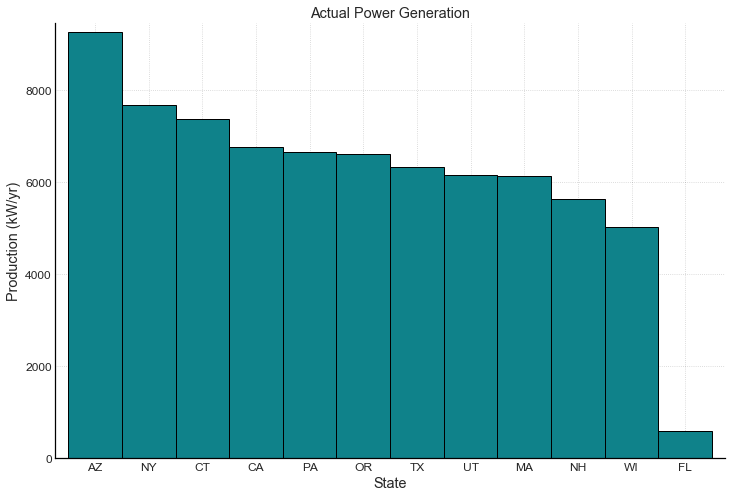

In [237]:

xticks = np.arange(len(state_energy.index))
height_ = state_energy.values

plt.bar(xticks, height_, **barplot_settings)
plt.xticks(xticks, state_energy.index.str.upper())
plt.title('Actual Power Generation')
plt.ylabel('Production (kW/yr)')
plt.xlabel('State')
plt.show()

In [238]:
pv_df_noOutliers[['state', 'county', 'incentive_count']].describe()

incentive_count
count      560476.0000
mean           50.1491
std             9.6891
min             8.0000
25%            40.0000
50%            56.0000
75%            58.0000
max            62.0000

In [239]:
# group by state and county, count number of incentives,
# then group by state and tally number of incentives available in each state
incentive_count = pv_df_noOutliers.groupby(['state','county'])[['incentive_count']].count().groupby('state')['incentive_count'].sum()

incentive_count = incentive_count.sort_values(ascending=False)
# incentive_count

# pv_df_noOutliers['incentive_count'].value_counts()

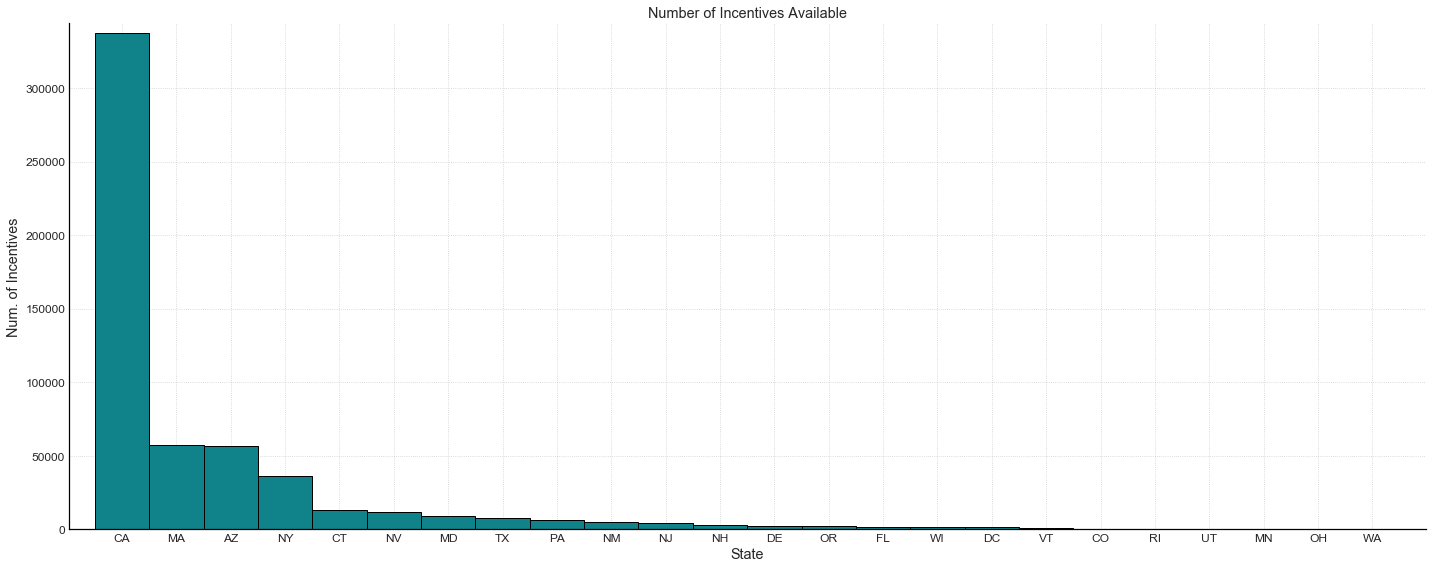

In [240]:
# INCENTIVES COUNT
# barplot of incentives count for each state

incentive_filter = incentive_count[incentive_count > 100]

plt.figure(figsize=(20,8))

state_labels = np.arange(len(incentive_filter.index))
state_incentives = incentive_filter.values

plt.bar(state_labels, state_incentives, **barplot_settings)
plt.xticks(state_labels, incentive_filter.index.str.upper())
plt.xlabel('State')
plt.ylabel('Num. of Incentives')
plt.title('Number of Incentives Available')

plt.tight_layout()
plt.show()


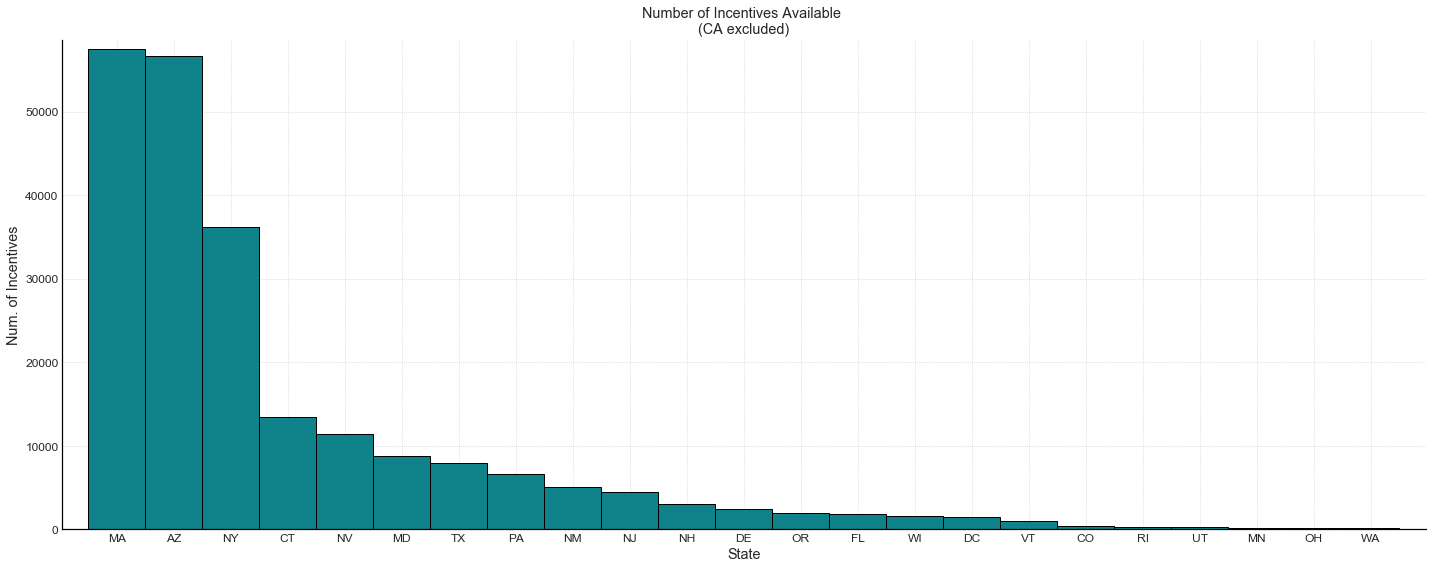

In [241]:
ca_drop = incentive_filter.drop('ca')

plt.figure(figsize=(20,8))

state_labels = np.arange(len(ca_drop.index))
state_incentives = ca_drop.values

plt.bar(state_labels, state_incentives, **barplot_settings)
plt.xticks(state_labels, ca_drop.index.str.upper())
plt.xlabel('State')
plt.ylabel('Num. of Incentives')
plt.title('Number of Incentives Available \n(CA excluded)')

plt.tight_layout()
plt.show()

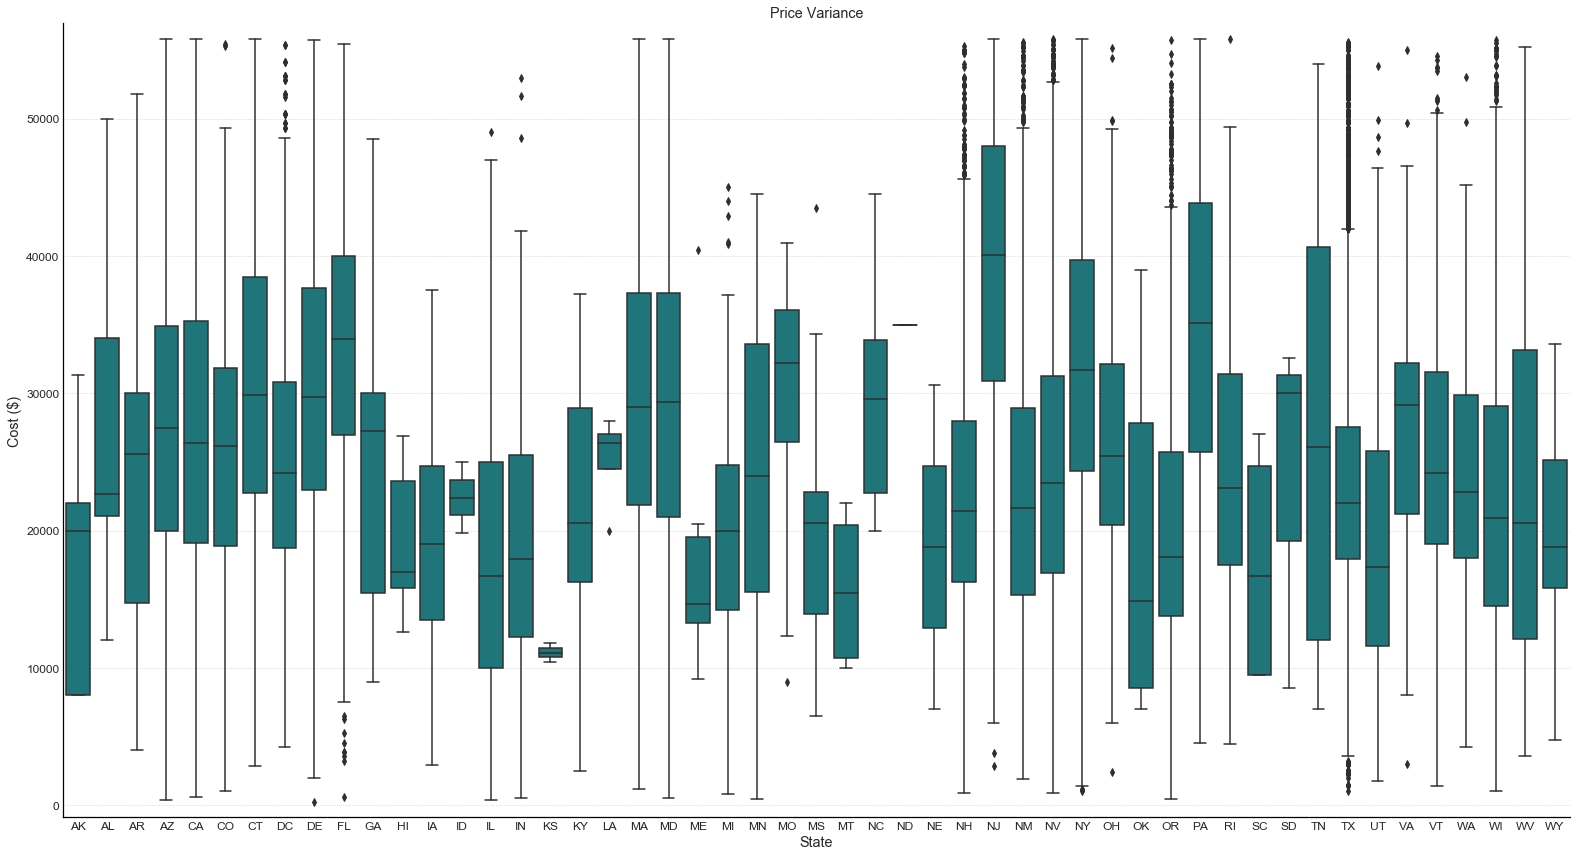

In [242]:
# Price variance of each state
h, pal = generate_palette('state')

plt.figure(figsize=(22,12))
sns.boxplot(x=pv_df_noOutliers['state'].str.upper().sort_values(),
            y=pv_df_noOutliers['cost'],
            color=color[2],
#             palette=pal,
           )
plt.title('Price Variance')
plt.xlabel('State')
plt.ylabel('Cost ($)')

plt.tight_layout()
plt.show()

#### Average Cost and Rebate Comparison

In [243]:
# groupby state, compute mean for cost and rebate
residential_cost = pv_df_noOutliers.groupby('state')[['rebate', 'cost']].mean().sort_values(by='cost', ascending=False)
# drop PR since it's only one data point
# residential_cost = residential_cost.drop('pr')

ave_cost = round(pv_df_noOutliers['cost'].mean(), 2)
ave_rebate = round(pv_df_noOutliers['rebate'].mean(), 2)

left_cost = np.arange(len(residential_cost))
height_cost = residential_cost['cost']

left_reb = np.arange(len(residential_cost))
height_reb = residential_cost['rebate']



In [244]:
color[1]

(0.2712000000000001, 0.54, 0.05999999999999994)

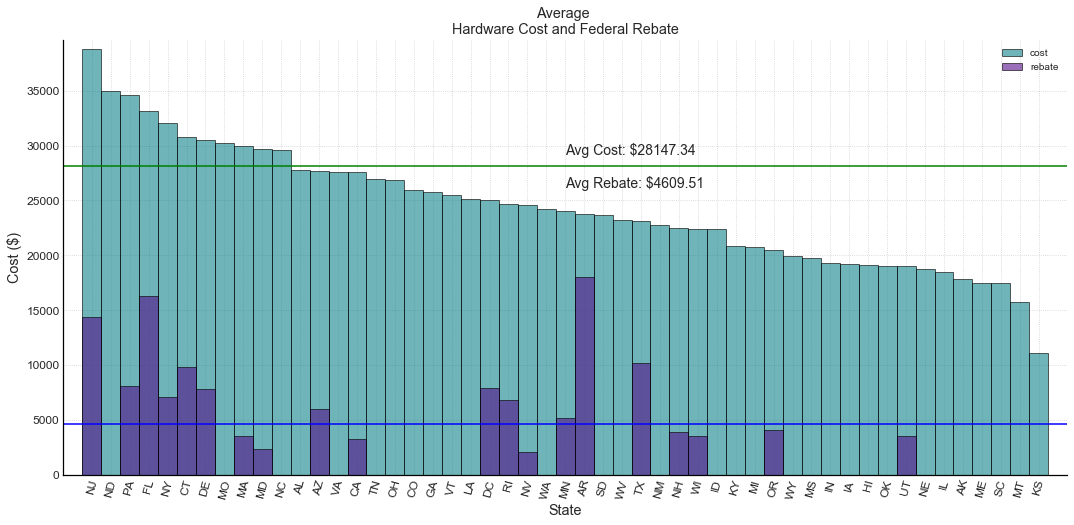

In [245]:
plt.figure(figsize=(18,8))

rect1 = plt.bar(left_cost, height_cost, **barplot_settings, alpha=0.6)
rect2 = plt.bar(left_reb, height_reb, width=1, edgecolor='k', color=color[3], alpha=0.6)

plt.xticks(left_cost, residential_cost.index.str.upper(), rotation = 75)

plt.title('Average \nHardware Cost and Federal Rebate')
plt.ylabel('Cost ($)')
plt.xlabel('State')

# average cost line
plt.axhline(y=ave_cost, color='green')
# average rebate line
plt.axhline(y=ave_rebate, color='blue')
# text over line
plt.text(25, ave_cost+1000, s= ('Avg Cost: ' + str('$') + str(ave_cost)), fontsize=14)
plt.text(25, ave_cost-2000, s= ('Avg Rebate: ' + str('$') + str(ave_rebate)), fontsize=14)

plt.legend((rect1[0], rect2[0]) ,['cost', 'rebate'], loc='upper right')

plt.show()

In [246]:
rebate_values = residential_cost.sort_values(by='state', ascending=True).dropna()

cost_values = residential_cost.sort_values(by='state', ascending=True).dropna()

cost_labels = np.arange(len(cost_values))
rebate_labels = np.arange(len(rebate_values))


In [247]:
# sns.palplot(sns.hls_palette(4, l=.3, s=.8))
# color = sns.hls_palette(4, l=.3, s=.8)
# color

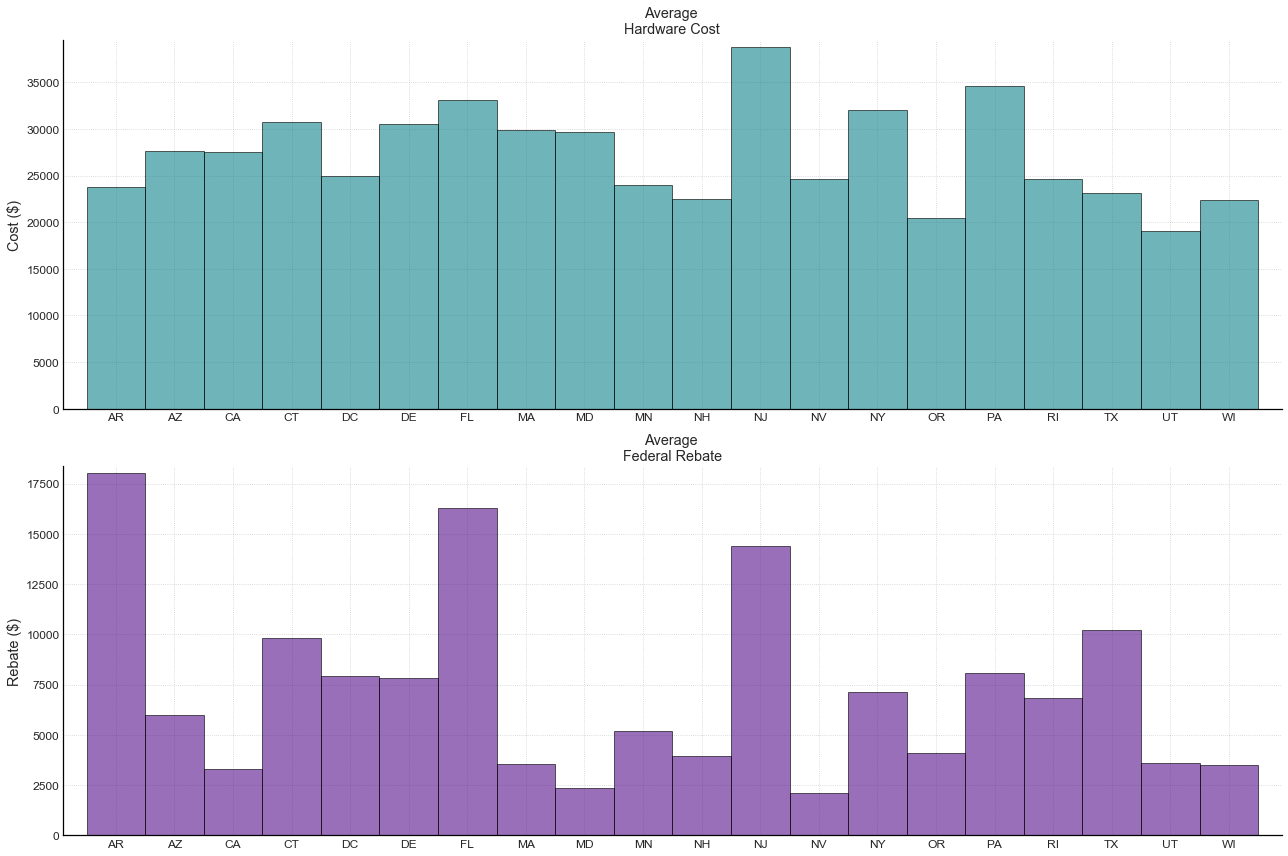

In [248]:
# plt.figure(figsize=(18,8))

bar2_settings = {'width': 1,
                'edgecolor': 'k',
                'color': color[3],
                 'alpha': 0.6
                }


plt.subplots(1,2, figsize=(18,12))

# plot hardware cost
plt.subplot(211)
plt.bar(cost_labels, cost_values['cost'], **barplot_settings, alpha=0.6)
plt.xticks(cost_labels, cost_values.index.str.upper())
plt.title('Average \nHardware Cost')
plt.ylabel('Cost ($)')

# plot rebate
plt. subplot(212)
plt.bar(rebate_labels, rebate_values['rebate'], **bar2_settings)
plt.xticks(rebate_labels, rebate_values.index.str.upper())
plt.title('Average \nFederal Rebate')
plt.ylabel('Rebate ($)')

plt.tight_layout()
plt.show()

In [249]:
print('---Highest Cost---')
print(cost_values.sort_values(by='cost', ascending=False)[:5])
print('\n---Lowest Cost---')
print(cost_values.sort_values(by='cost', ascending=True)[:5])

print('\n---Highest Rebate---')
print(rebate_values.sort_values(by='rebate', ascending=False)[:5])
print('\n---Lowest Rebate---')
print(rebate_values.sort_values(by='rebate', ascending=True)[:5])

---Highest Cost---
          rebate       cost
state                      
nj    14378.8777 38825.5992
pa     8075.9952 34618.1122
fl    16281.8979 33140.9392
ny     7145.2046 32096.2822
ct     9818.4181 30778.6277

---Lowest Cost---
          rebate       cost
state                      
ut     3584.9795 19043.1911
or     4077.5909 20470.6036
wi     3512.2324 22408.9625
nh     3929.6539 22497.7438
tx    10231.1542 23159.6413

---Highest Rebate---
          rebate       cost
state                      
ar    18007.5000 23781.2421
fl    16281.8979 33140.9392
nj    14378.8777 38825.5992
tx    10231.1542 23159.6413
ct     9818.4181 30778.6277

---Lowest Rebate---
         rebate       cost
state                     
nv    2097.3417 24601.2882
md    2349.9136 29641.2523
ca    3288.6579 27568.1807
wi    3512.2324 22408.9625
ma    3524.8460 29947.7610


### 1. Which states have the least and most expensive installations; which states have highest incentives? 

The available data for incentives and rebate amount only includes the rebate received from state government, not the federal. Federal incentives are be available but are not represented in this dataset. Rebate data is not available for all states.

The barplots above conclusively show the states which have highest hardware costs and highest Federal rebates.


|Highest Cost| Price |Lowest Cost| Price |
|-|-|-|-|
|New Jersey| 46,276.05 |Utah| 19,852.53 |
|Pennsylvania| 40,594.02 |Oregon| 21,073.51 |
|New York| 35,089.62 |New Hampshire| 22,666.74 |




In [250]:
pv_df_noOutliers.loc[:, ['date_installed']].describe()

date_installed
count          564781
unique           5038
top        2015-09-30
freq             1366

### 2. How have the prices changed? 

In [251]:
# =============================================================================
# CUT INTERVAL FOR SIZE
# =============================================================================
size = pv_df_noOutliers['size_kw']
pv_df_noOutliers['size_catg'] = pd.qcut(size.values, 3, labels=['small', 'normal', 'large'])

In [252]:
date_time = '%Y-%m-%d'
datetime = pd.to_datetime(pv_df_noOutliers['date_installed'], format=date_time)
pv_df = pv_df_noOutliers.set_index(datetime)

# pv_df[pv_df['date_installed'] > '2015-01-01'].info()

In [253]:
small_sys = pv_df[pv_df['size_catg'] == 'small']
normal_sys = pv_df[pv_df['size_catg'] == 'normal']
large_sys = pv_df[pv_df['size_catg'] == 'large']

In [254]:
def time_series_plot(array, date_range=None, title=None, ylabel=None, xlabel='Year', **kwargs):
    """
    Parameters:
    ----------
    array: values to plot
    date_range: dates to plot, input as list
    
    Returns:
    ----------
    time-series plot
    """
    
    plot_values = array
    if date_range != None:
        plot_values = array[date_range[0]: date_range[1]]
    else:
        plt.plot(plot_values, **kwargs)
        
    plt.plot(plot_values, **kwargs)
    plt.xticks(rotation=60)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()
   

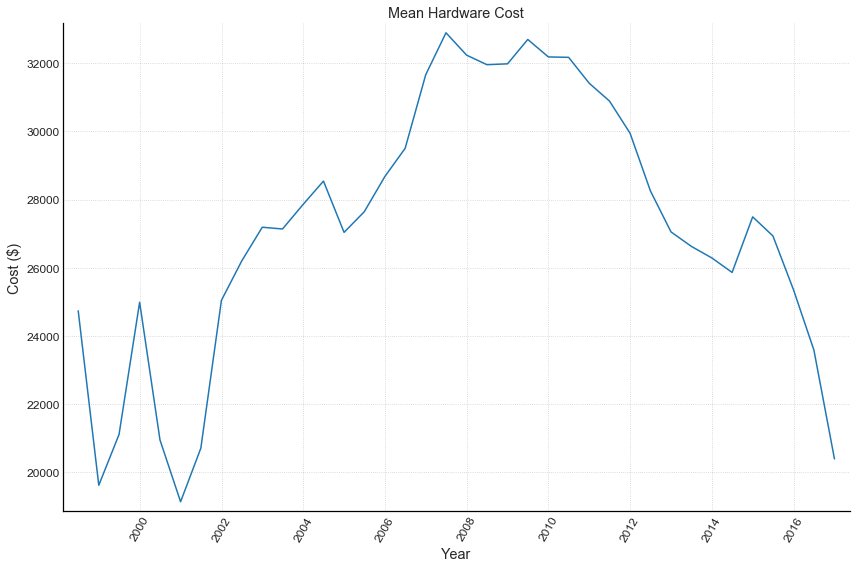

In [255]:
# =============================================================================
# Cost Time-Series
# =============================================================================
# resample by 6 months and compute mean
mean_cost_arr = pv_df['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')

date_range = ['1998', '2016']

time_series_plot(mean_cost_arr,
                 date_range,
                 title='Mean Hardware Cost',
                 ylabel='Cost ($)',
                )

In [256]:
percent_change = (mean_cost_arr['2008'].mean() - mean_cost_arr['2017'].mean()) / mean_cost_arr['2008'].mean()
print('Average hardware price decrease of ' + str(round(percent_change*100, 2)) + '% from 2008 peak to 2017.')

Average hardware price decrease of 36.88% from 2008 peak to 2017.


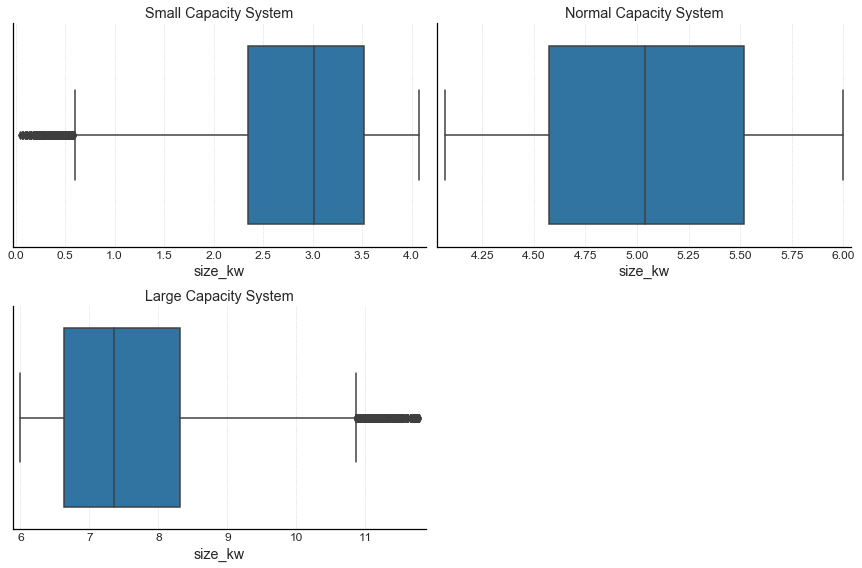

In [257]:
# interval box plots
plt.subplot(221)
sns.boxplot(small_sys['size_kw'])
plt.title('Small Capacity System')

plt.subplot(222)
sns.boxplot(normal_sys['size_kw'])
plt.title('Normal Capacity System')

plt.subplot(223)
sns.boxplot(large_sys['size_kw'])
plt.title('Large Capacity System')

plt.tight_layout()
plt.show()

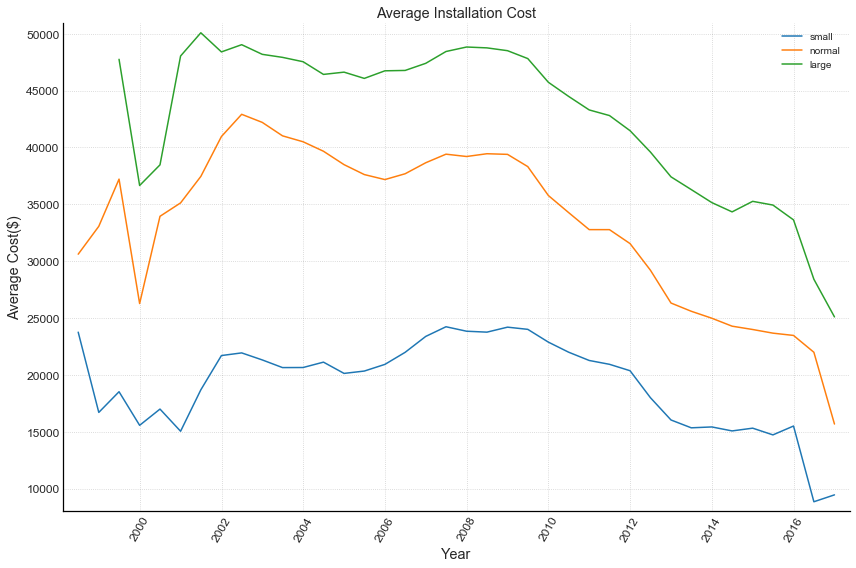

In [258]:
# Time-Series
# Small, Normal, Large Systems

# extract cost and resample
small_sys_cost = small_sys['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')
normal_sys_cost = normal_sys['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')
large_sys_cost = large_sys['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')

# plot TS
plt.plot(small_sys_cost['1998':'2016'])
plt.plot(normal_sys_cost['1998':'2016'])
plt.plot(large_sys_cost['1998':'2016'])
# label
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Average Cost($)')
plt.title('Average Installation Cost')
plt.legend(('small', 'normal', 'large'), loc='upper right')
plt.tight_layout()
plt.show()

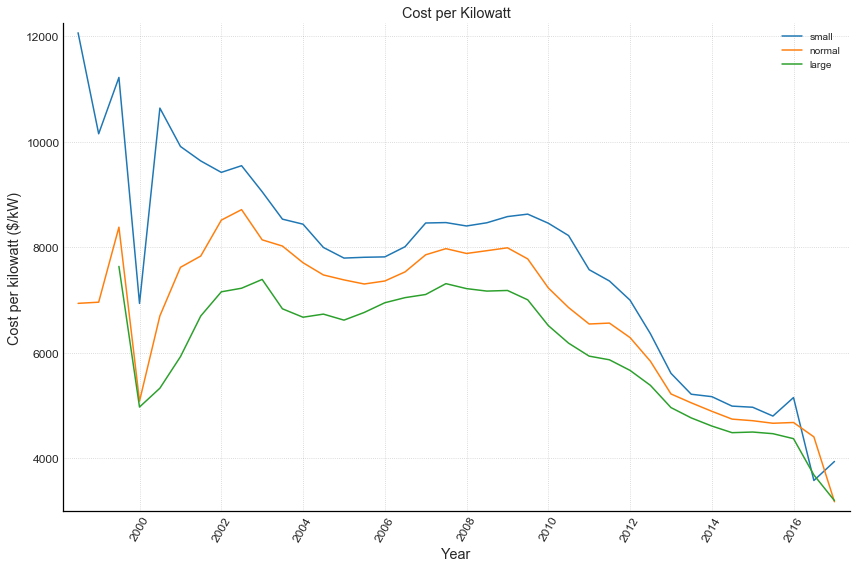

In [259]:
# cost per kilowatt of various systems

# resample by 6 months and compute mean
sm_cost_per_watt = small_sys['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')
nr_cost_per_watt = normal_sys['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')
lg_cost_per_watt = large_sys['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')


date_range = ['1998', '2016']
# plot TS
plt.plot(sm_cost_per_watt[date_range[0]:date_range[1]])
plt.plot(nr_cost_per_watt[date_range[0]:date_range[1]])
plt.plot(lg_cost_per_watt[date_range[0]:date_range[1]])
# label
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Cost per kilowatt ($/kW)')
plt.title('Cost per Kilowatt')
plt.legend(('small', 'normal', 'large'), loc='upper right')
plt.tight_layout()
plt.show()

In [260]:
print('---Cost per kilowatt---')
print('Small cap: ', sm_cost_per_watt.mean())
print('Normal cap:', nr_cost_per_watt.mean())
print('Large cap: ', lg_cost_per_watt.mean())

---Cost per kilowatt---
Small cap:  7559.122340722437
Normal cap: 6434.016880390863
Large cap:  5910.671471844737


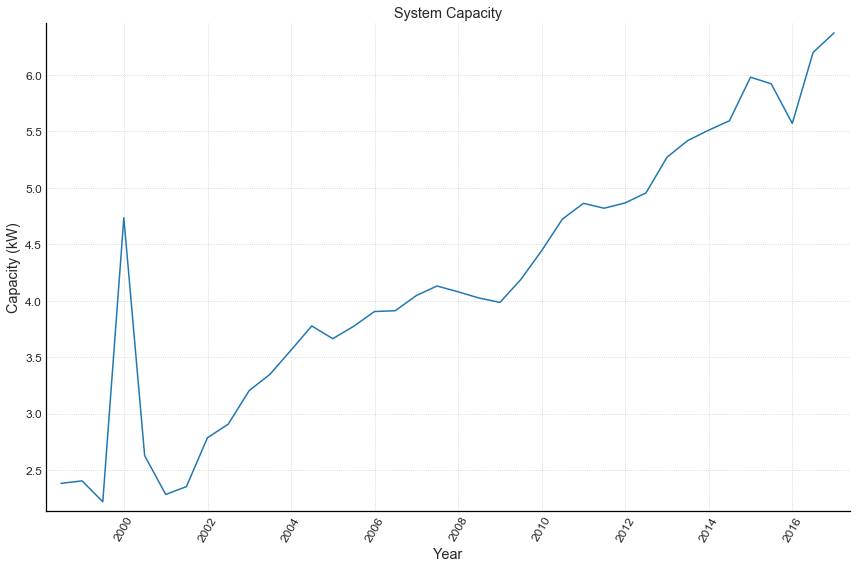

In [261]:
# system capactiy 

size_plt = pv_df['size_kw'].resample('6M').agg('mean').dropna(axis=0, how='all')

time_series_plot(size_plt,
                ['1998','2016'],
                title='System Capacity',
                ylabel='Capacity (kW)',
                )

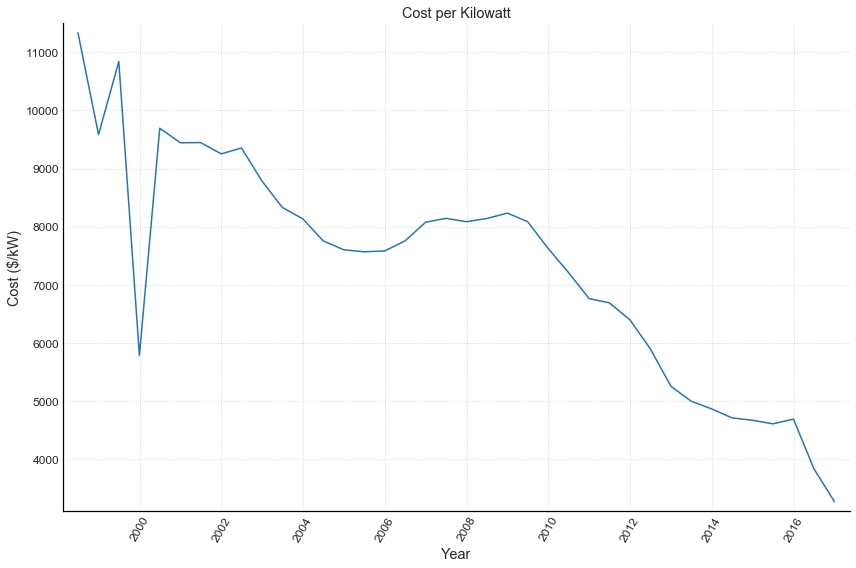

In [262]:
# cost per kilowatt

cost_per_watt = pv_df['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')

time_series_plot(cost_per_watt,
                ['1998', '2016'],
                title='Cost per Kilowatt',
                ylabel='Cost ($/kW)',
                )


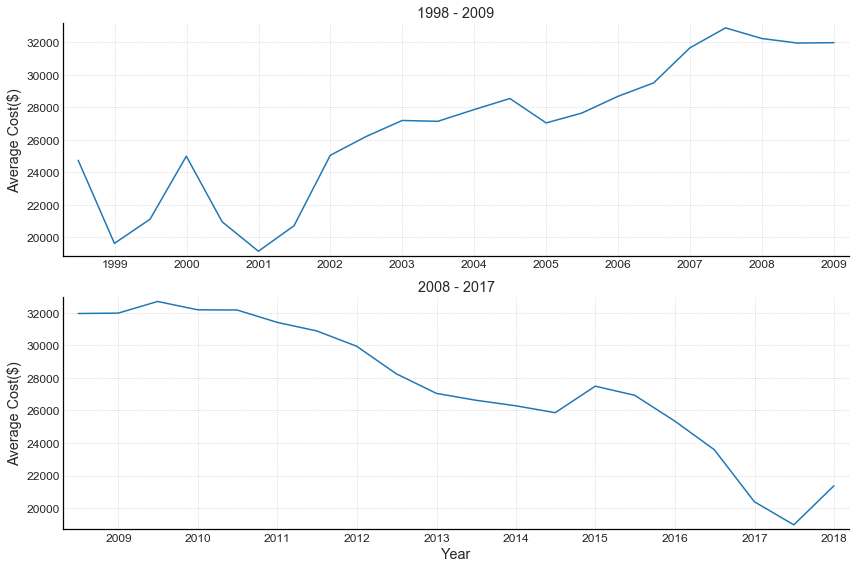

In [263]:
# =============================================================================
# 1998 to 2009
# =============================================================================
plt.subplot(211)
plt.plot(mean_cost_arr['1998':'2008'])
# plt.xlabel('Year')
plt.ylabel('Average Cost($)')
plt.title('1998 - 2009')


# =============================================================================
# 2009 to 2017
# =============================================================================
plt.subplot(212)
plt.plot(mean_cost_arr['2008':'2017'])
plt.xlabel('Year')
plt.ylabel('Average Cost($)')
plt.title('2008 - 2017')
plt.tight_layout()
plt.show()


In [264]:
print(pv_df['2012':'2016'][['cost', 'annual_pv_prod']].describe())

pv_df['2007':'2011'][['cost', 'annual_pv_prod']].describe()

             cost  annual_pv_prod
count 361427.0000     361427.0000
mean   26483.4617       8037.3839
std    10743.2334       3040.2905
min      360.0000         76.4393
25%    18564.0000       5727.8109
50%    25612.2500       7844.8229
75%    33660.0000      10255.8369
max    55827.1800      14914.5807


cost  annual_pv_prod
count 179112.0000     179112.0000
mean   31507.6972       6909.4069
std    11335.8183       2814.7144
min      227.0000        114.7728
25%    22774.0375       4762.4023
50%    30821.5000       6637.9894
75%    39999.0000       8788.1285
max    55827.9000      14908.4139

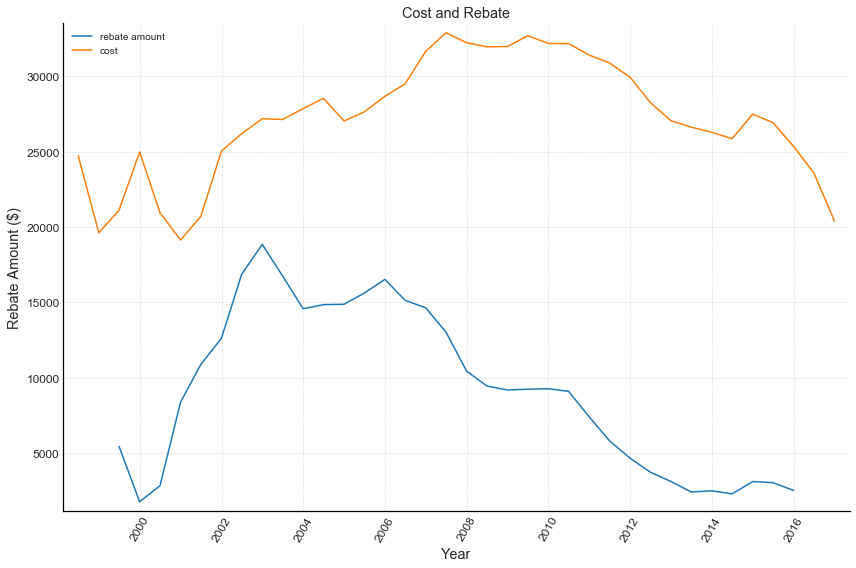

In [265]:
# Rebates
# =============================================================================
mean_rebate = pv_df['rebate'].resample('6M').agg('mean').dropna(axis=0, how='all')

date_range = ['1998', '2016']

plt.plot(mean_rebate[date_range[0]:date_range[1]])
plt.plot(mean_cost_arr[date_range[0]:date_range[1]])
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Rebate Amount ($)')
plt.legend(('rebate amount', 'cost'), loc='upper left')
plt.title('Cost and Rebate')
plt.tight_layout()
plt.show()


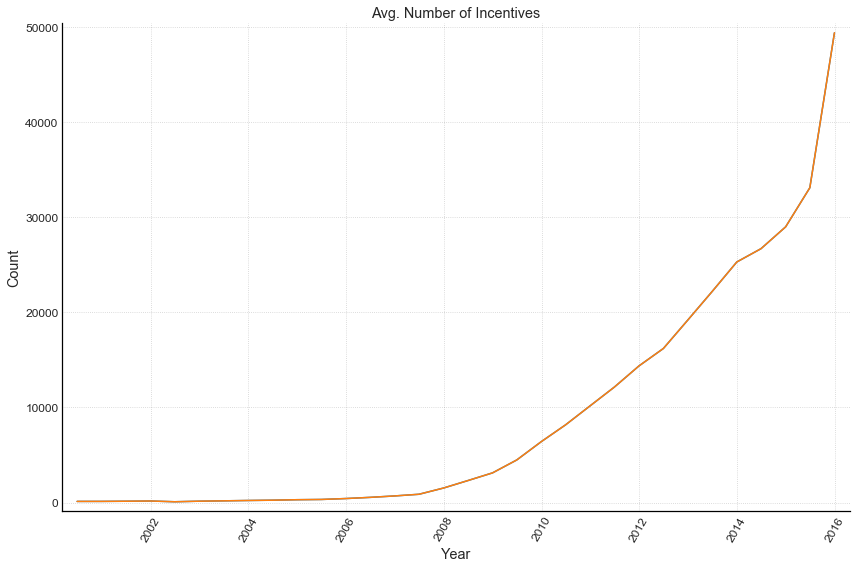

In [266]:
# =============================================================================
# Count Incentives and Rebates
# =============================================================================
incent_count = pv_df['incentive_prog_names'].resample('6M').agg('count').dropna(axis=0, how='all')
incentives = incent_count['1998':'2015'].rolling(5).mean()

time_series_plot(incentives,
#                  ['2003','2012'],
                 title='Avg. Number of Incentives',
                 ylabel='Count',
                )


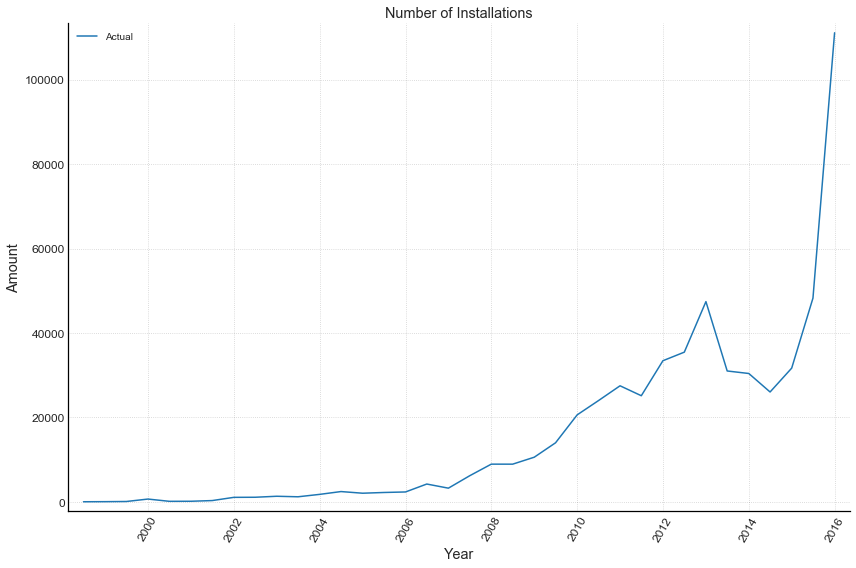

In [267]:
# =============================================================================
# Number of Installations
# =============================================================================
# count installations per year
install_count = pv_df['cost'].resample('6M').agg('count').dropna(axis=0, how='all')

plt.plot(install_count['1998':'2015'])
# plt.plot(install_count['1998':'2015'].rolling(5).mean()) 
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Number of Installations')
plt.legend(('Actual', 'rolling mean'))
plt.tight_layout()
plt.show()


#### Power Generation (Annual)
The following plots show the annual power production estimates as well as the actual. In general, the power output calculation has a number of variables including area of array, panel efficiency, average annual solar radiation, and performance ratio. In addition, other factors can can affect an array's output such as hours of direct sunlight, orientation, and of course adverse weather conditions. 

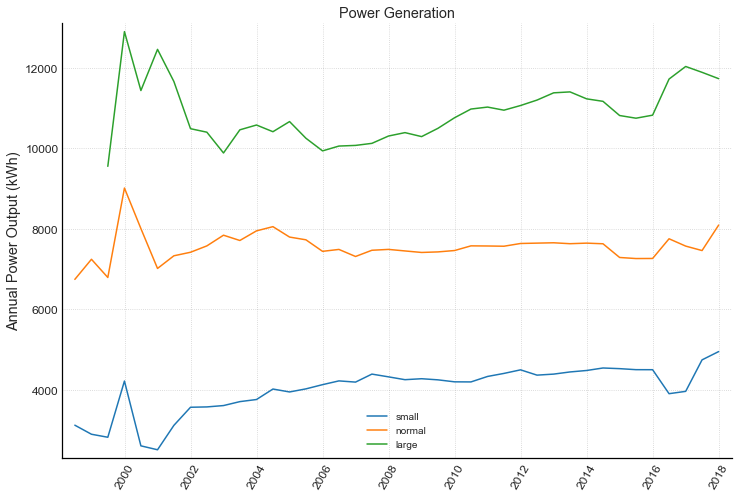

In [268]:
sm_mean_kwh_prod = small_sys['annual_pv_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')
nr_mean_kwh_prod = normal_sys['annual_pv_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')
lg_mean_kwh_prod = large_sys['annual_pv_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')

date_range = ['1998','2017']

plt.plot(sm_mean_kwh_prod[date_range[0]: date_range[1]])
plt.plot(nr_mean_kwh_prod[date_range[0]: date_range[1]])
plt.plot(lg_mean_kwh_prod[date_range[0]: date_range[1]])

plt.xticks(rotation=60)
plt.ylabel('Annual Power Output (kWh)')
plt.title('Power Generation')
plt.legend(('small', 'normal', 'large'), loc='lower center')

plt.show()

#### 3. Which factors contribute the most to the total cost? 

Where is the greatest correlation between cost and another variable?

In [269]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [270]:
pv_df_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564781 entries, 0 to 564780
Data columns (total 30 columns):
state                          564781 non-null object
date_installed                 564781 non-null object
incentive_prog_names           424074 non-null object
size_kw                        564781 non-null float64
zipcode                        564781 non-null int64
install_type                   564781 non-null category
installer                      371134 non-null object
cost_per_watt                  564777 non-null float64
cost                           564781 non-null float64
city                           425403 non-null object
utility_clean                  422125 non-null object
tech_1                         333455 non-null category
model1_clean                   333455 non-null object
county                         561155 non-null object
annual_pv_prod                 564781 non-null float64
annual_insolation              564776 non-null float64
rebate           

In [271]:
pv_df['2000':'2016'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 563846 entries, 2014-01-17 to 2016-11-04
Data columns (total 30 columns):
state                          563846 non-null object
date_installed                 563846 non-null object
incentive_prog_names           423515 non-null object
size_kw                        563846 non-null float64
zipcode                        563846 non-null int64
install_type                   563846 non-null category
installer                      370537 non-null object
cost_per_watt                  563842 non-null float64
cost                           563846 non-null float64
city                           424745 non-null object
utility_clean                  421574 non-null object
tech_1                         333454 non-null category
model1_clean                   333454 non-null object
county                         560322 non-null object
annual_pv_prod                 563846 non-null float64
annual_insolation              563841 non-null float64
r

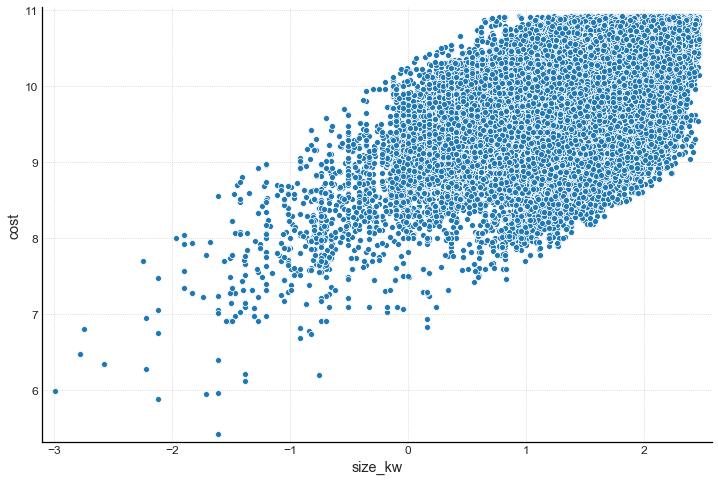

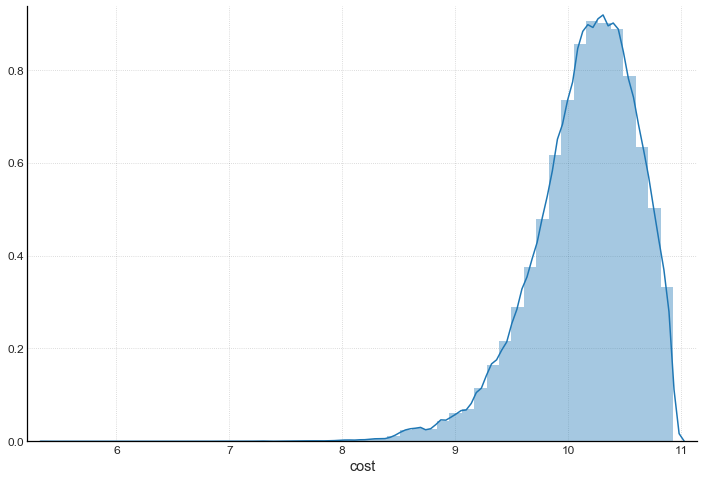

In [272]:
"""
Log transformation seems to provide the most linear looking relationship between size_kw and cost
"""
y = np.log(pv_df['2000':'2016']['cost']) 
x = np.log(pv_df['2000':'2016']['size_kw'])

sns.scatterplot(x,y)
plt.show()

sns.distplot(y)
plt.show()

In [273]:
mean = x.mean()
std = x.std()
cutoff = std * 3

lower = mean - cutoff
upper = mean + cutoff

x_norm = x[(x > lower) & (x < upper)]

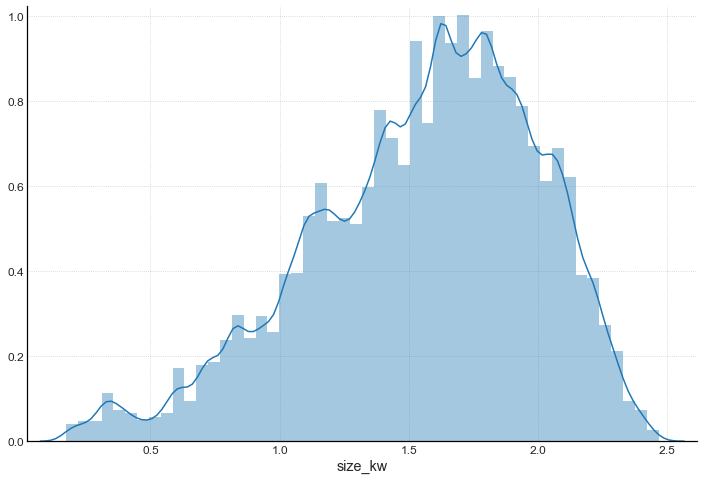

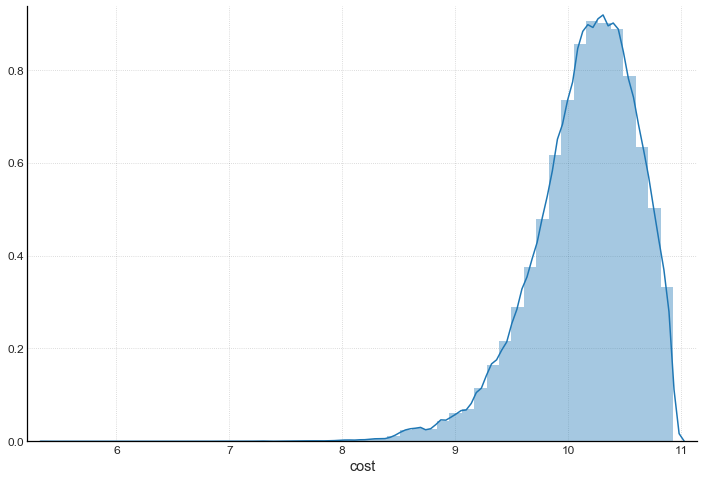

In [274]:
sns.distplot(x_norm)
plt.show()

sns.distplot(y)
plt.show()

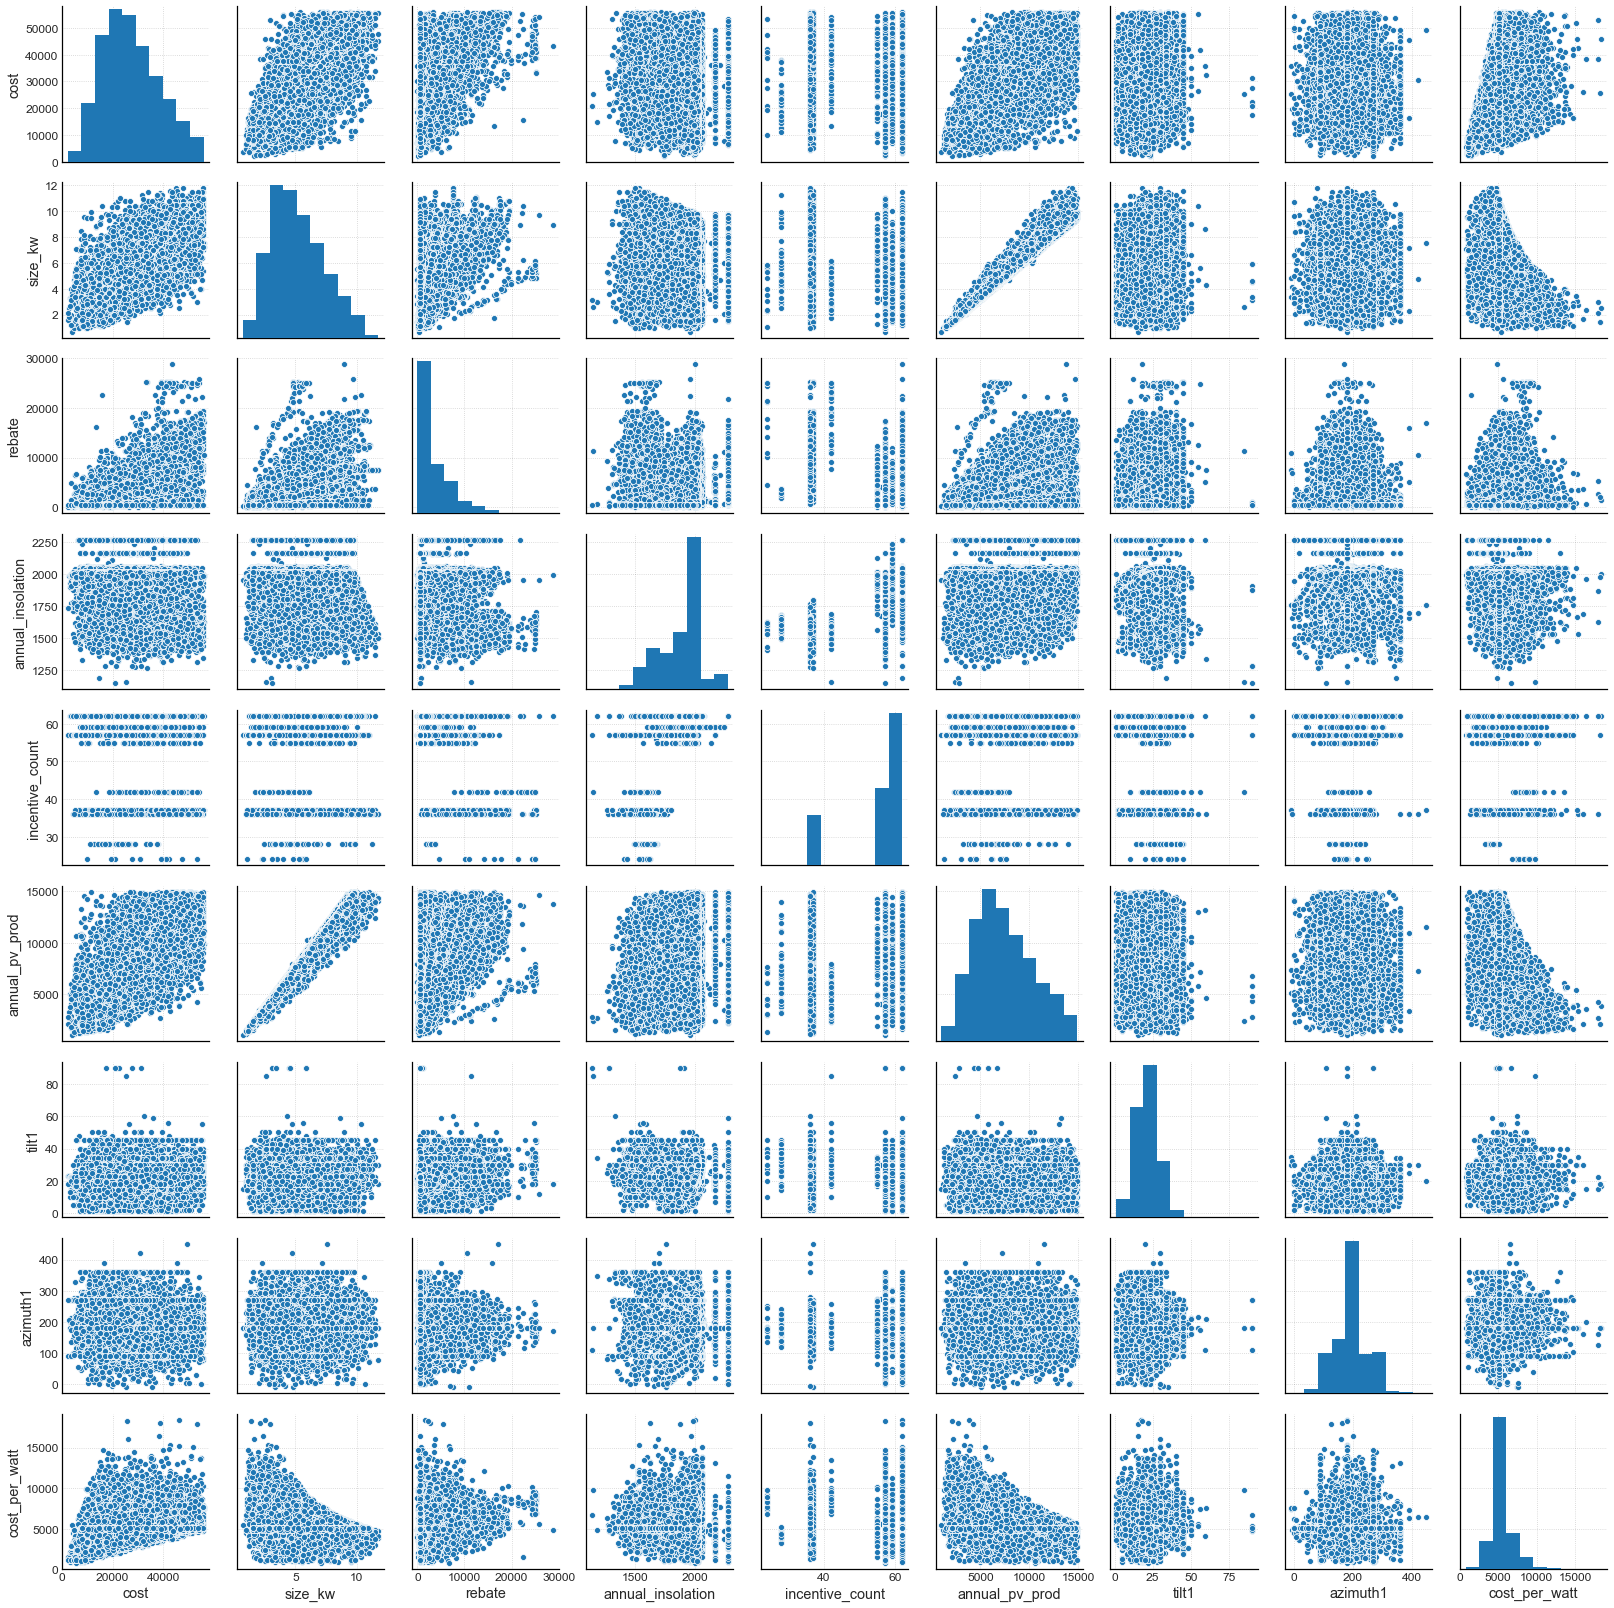

In [275]:
# CORRELATION
# drop NA before computing correlation
clean_pv = pv_df_noOutliers.dropna(how='any').reset_index(drop=True)
pearson_r(clean_pv['size_kw'],clean_pv['cost'])

# pair plot
sns.pairplot(clean_pv[['cost', 'size_kw', 'rebate', 'annual_insolation', 'tracking_type', 'incentive_count',
                       'annual_pv_prod', 'tilt1', 'azimuth1', 'cost_per_watt']])
plt.show()

In [276]:
test_ls = ['cost', 'size_kw', 'cost_per_watt', 'rebate', 'annual_insolation', 'incentive_count', 'annual_pv_prod', 'tilt1', 'azimuth1']

for item in test_ls:
    n = pearson_r(clean_pv[item],clean_pv['cost'])
    print('cost-' + str(item) + str(': ') + str(n))

cost-cost: 0.9999999999999986
cost-size_kw: 0.8262881020171691
cost-cost_per_watt: 0.2562371419449847
cost-rebate: 0.5681732936244998
cost-annual_insolation: -0.21541851988605154
cost-incentive_count: -0.32662180357881326
cost-annual_pv_prod: 0.7812499102263638
cost-tilt1: 0.15740050641897693
cost-azimuth1: -0.020673686522213783


In [277]:
pv_df.head()

state date_installed incentive_prog_names  size_kw  zipcode install_type installer  \
date_installed                                                                                      
2014-01-17        tx     2014-01-17        austin energy   5.4000    78702  residential       NaN   
2012-09-27        tx     2012-09-27        austin energy   7.5000    78702  residential       NaN   
2012-09-26        tx     2012-09-26        austin energy   5.0000    78702  residential       NaN   
2012-11-29        tx     2012-11-29        austin energy   3.3600    78702  residential       NaN   
2013-03-12        tx     2013-03-12        austin energy   7.0000    78702  residential       NaN   

                cost_per_watt       cost    city  utility_clean tech_1      model1_clean  county  \
date_installed                                                                                     
2014-01-17          4197.3296 22665.5800  austin  austin energy   mono       plm-300m-72  travis   
2012-09-27          3750.0000 28125.0000  austin  austin energy   poly  multiple matches  travis   
2012-09-26          3850.0000 19250.0000  austin  austin energy   poly  multiple matches  travis   
2012-11-29          3689.8899 12398.0300  austin  austin energy   poly  multiple matches  travis   
2013-03-12          3495.4843 24468.3900  austin  austin energy   poly      tsm-250pa05a  travis   

                annual_pv_prod  annual_insolation     rebate  sales_tax_cost   tilt1  \
date_installed                                                                         
2014-01-17           7833.7428          1920.8906  7735.5000        854.0198 18.5000   
2012-09-27          10151.7096          1796.1547 14550.0000       1058.5237  5.0000   
2012-09-26           7307.1338          1936.2438  9600.0000        724.5006 33.0000   
2012-11-29           4787.5505          1889.0495  6451.2000        466.6172 25.0000   
2013-03-12           9941.3441          1882.4813 13440.0000        920.9020 10.0000   

               tracking_type  azimuth1  reported_annual_energy_prod  3rdparty  incentive_count  \
date_installed                                                                                   
2014-01-17             fixed  165.0000                    7235.0000         0          38.0000   
2012-09-27             fixed  260.0000                    9340.0000         0          38.0000   
2012-09-26             fixed  205.0000                    6729.0000         0          38.0000   
2012-11-29             fixed  230.0000                    4407.0000         0          38.0000   
2013-03-12             fixed  195.0000                    9168.0000         0          38.0000   

                total_cost  area_est  power_density  rebate_cost_ratio  sales_tax_percent  \
date_installed                                                                              
2014-01-17      41210.1455   30.2088         0.1788            34.1288             3.7679   
2012-09-27      51136.3636   41.8660         0.1791            51.7333             3.7636   
2012-09-26      35000.0000   27.9546         0.1789            49.8701             3.7636   
2012-11-29      22541.8727   18.7731         0.1790            52.0341             3.7636   
2013-03-12      44487.9818   39.1184         0.1789            54.9280             3.7636   

               size_catg  
date_installed            
2014-01-17        normal  
2012-09-27         large  
2012-09-26        normal  
2012-11-29         small  
2013-03-12         large

In [278]:
14999.8316 / (0.75 * 1882.5575 * 0.15)

70.82484144279495

In [279]:
pv_df_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564781 entries, 0 to 564780
Data columns (total 30 columns):
state                          564781 non-null object
date_installed                 564781 non-null object
incentive_prog_names           424074 non-null object
size_kw                        564781 non-null float64
zipcode                        564781 non-null int64
install_type                   564781 non-null category
installer                      371134 non-null object
cost_per_watt                  564777 non-null float64
cost                           564781 non-null float64
city                           425403 non-null object
utility_clean                  422125 non-null object
tech_1                         333455 non-null category
model1_clean                   333455 non-null object
county                         561155 non-null object
annual_pv_prod                 564781 non-null float64
annual_insolation              564776 non-null float64
rebate           

### Summary

It provides our planet with seemingly endless energy every single day since the birth of our solar system, that is the Sun. We have made significant technological progress to enable us to capture some of that energy. 

Over the past 20 years, on average, the most expensive installation costs were in New Jersey (\\$49,282.18), Florida (\\$34,231.69), and Pennsylvania (\\$33,941.69), respectively. The highest rebates were achieved by New Jersey (\\$18,322.60), Florida(\\$15,437.61), and Connecticut (\\$11,637.82). The cheapest installation costs were in Michigan (\\$8,000), Illinois (\\$13,000), and Indiana (\\$16,453.15). Also, it's important to note that these figures encompass the past 20 years and are not representative of the most recent figures. 

Installation costs peaked between years 2008 and 2009 and have been declining since that time. To be more precise, installation costs have declined about 51\% since 2008. It is also important to note that the *cost per watt* has actually been declining since 1998 with a change of 77\%. During the period of 1998 to 2018 the number of installations and number of rebates has increased dramatically due to the change in costs and advancements in photovoltaic technology. These developments have created more favorable conditions for the consumer to switch to solar power. 

It is no surprise to find that a large capacity system (10kW) would cost more than a relatively small capacity (3kW). The capacity of the system is one of the major contributors to the installation cost. However, since insolation rates vary depending on geographic location, a system of same capacity (ex. 5kW) will not produce the same amount of energy around the country. So, dependning on how much energy a home consumes annually, the system capacity will be sized accordingly. Thus the cost will also depend on the amount of energy a home consumes throughout the year.    

In [280]:
os.getcwd()

'C:\\Users\\smouz\\OneDrive\\Desktop\\DataSci\\Python\\SP-Capstone-PY\\Capstone'

In [281]:
os.chdir('/')

In [282]:
write_path = "Users\\smouz\\Google Drive\\jupyter_notebook\\capstone\\"

In [283]:
print('Writing to:', os.getcwd()+write_path)
pv_df_noOutliers.to_csv(write_path+'pv_df_clean_2.csv', encoding='utf-8', index=False)
print('Done!')


Writing to: C:\Users\smouz\Google Drive\jupyter_notebook\capstone\
Done!
